In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

# Visualization of data

## Overview visualization

In [2]:
games = pd.read_pickle('datasets/cleaned_steam_games.pkl')
games.head()

,name,all_reviews,recommend,release_date,release_date_epoch_days,developer,publisher,popular_tags,languages,genre,...,discount_percentage,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy
0,DOOM,92,True,2016-05-12,16933,id Software,Bethesda Softworks,"[FPS, Gore, Action, Demons, Shooter, First-Per...","[English, French, Italian, German, Spanish - S...",[Action],...,25.012506,1,0,0,0,0,0,0,0,0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,False,2017-12-21,17521,PUBG Corporation,PUBG Corporation,"[Survival, Shooter, Multiplayer, Battle Royale...","[English, Korean, Simplified Chinese, French, ...","[Action, Adventure, Massively Multiplayer]",...,0.000000,1,1,0,1,0,0,0,0,0
2,BATTLETECH,71,True,2018-04-24,17645,Harebrained Schemes,Paradox Interactive,"[Mechs, Strategy, Turn-Based, Turn-Based Tacti...","[English, French, German, Russian]","[Action, Adventure, Strategy]",...,0.000000,1,1,0,0,0,0,0,0,1
3,DayZ,61,False,2018-12-13,17878,Bohemia Interactive,Bohemia Interactive,"[Survival, Zombies, Open World, Multiplayer, P...","[English, French, Italian, German, Spanish - S...","[Action, Adventure, Massively Multiplayer]",...,0.000000,1,1,0,1,0,0,0,0,0
4,EVE Online,74,True,2003-05-06,12178,CCP,CCP,"[Space, Massively Multiplayer, Sci-fi, Sandbox...","[English, German, Russian, French]","[Action, Massively Multiplayer, RPG, Strategy]",...,0.000000,1,0,0,1,1,0,0,0,1


In [3]:
print("Dimension of games: ", games.shape)

Dimension of games:  (11620, 23)


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11620 entries, 0 to 40811
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype           
---  ------                       --------------  -----           
 0   name                         11620 non-null  object          
 1   all_reviews                  11620 non-null  int64           
 2   recommend                    11620 non-null  bool            
 3   release_date                 11620 non-null  datetime64[ns]  
 4   release_date_epoch_days      11620 non-null  int64           
 5   developer                    11620 non-null  object          
 6   publisher                    11620 non-null  object          
 7   popular_tags                 11620 non-null  object          
 8   languages                    11620 non-null  object          
 9   genre                        11620 non-null  object          
 10  mature_content               11620 non-null  bool            
 11  original_price 

In [5]:
games.dtypes

name                                     object
all_reviews                               int64
recommend                                  bool
release_date                     datetime64[ns]
release_date_epoch_days                   int64
developer                                object
publisher                                object
popular_tags                             object
languages                                object
genre                                    object
mature_content                             bool
original_price                          float64
discount_price                          float64
discount_percentage                     float64
genre_Action                   Sparse[int32, 0]
genre_Adventure                Sparse[int32, 0]
genre_Casual                   Sparse[int32, 0]
genre_Massively Multiplayer    Sparse[int32, 0]
genre_RPG                      Sparse[int32, 0]
genre_Racing                   Sparse[int32, 0]
genre_Simulation               Sparse[in

# Response Variables
- The main response variable is `recommend`
- `all_reviews` is shown merely for visualization purpose.  

## All reviews

In [6]:
# Describe all reviews
games['all_reviews'].describe()

count    11620.000000
mean        73.634079
std         18.682198
min          0.000000
25%         63.000000
50%         77.000000
75%         88.000000
max        100.000000
Name: all_reviews, dtype: float64

<AxesSubplot:>

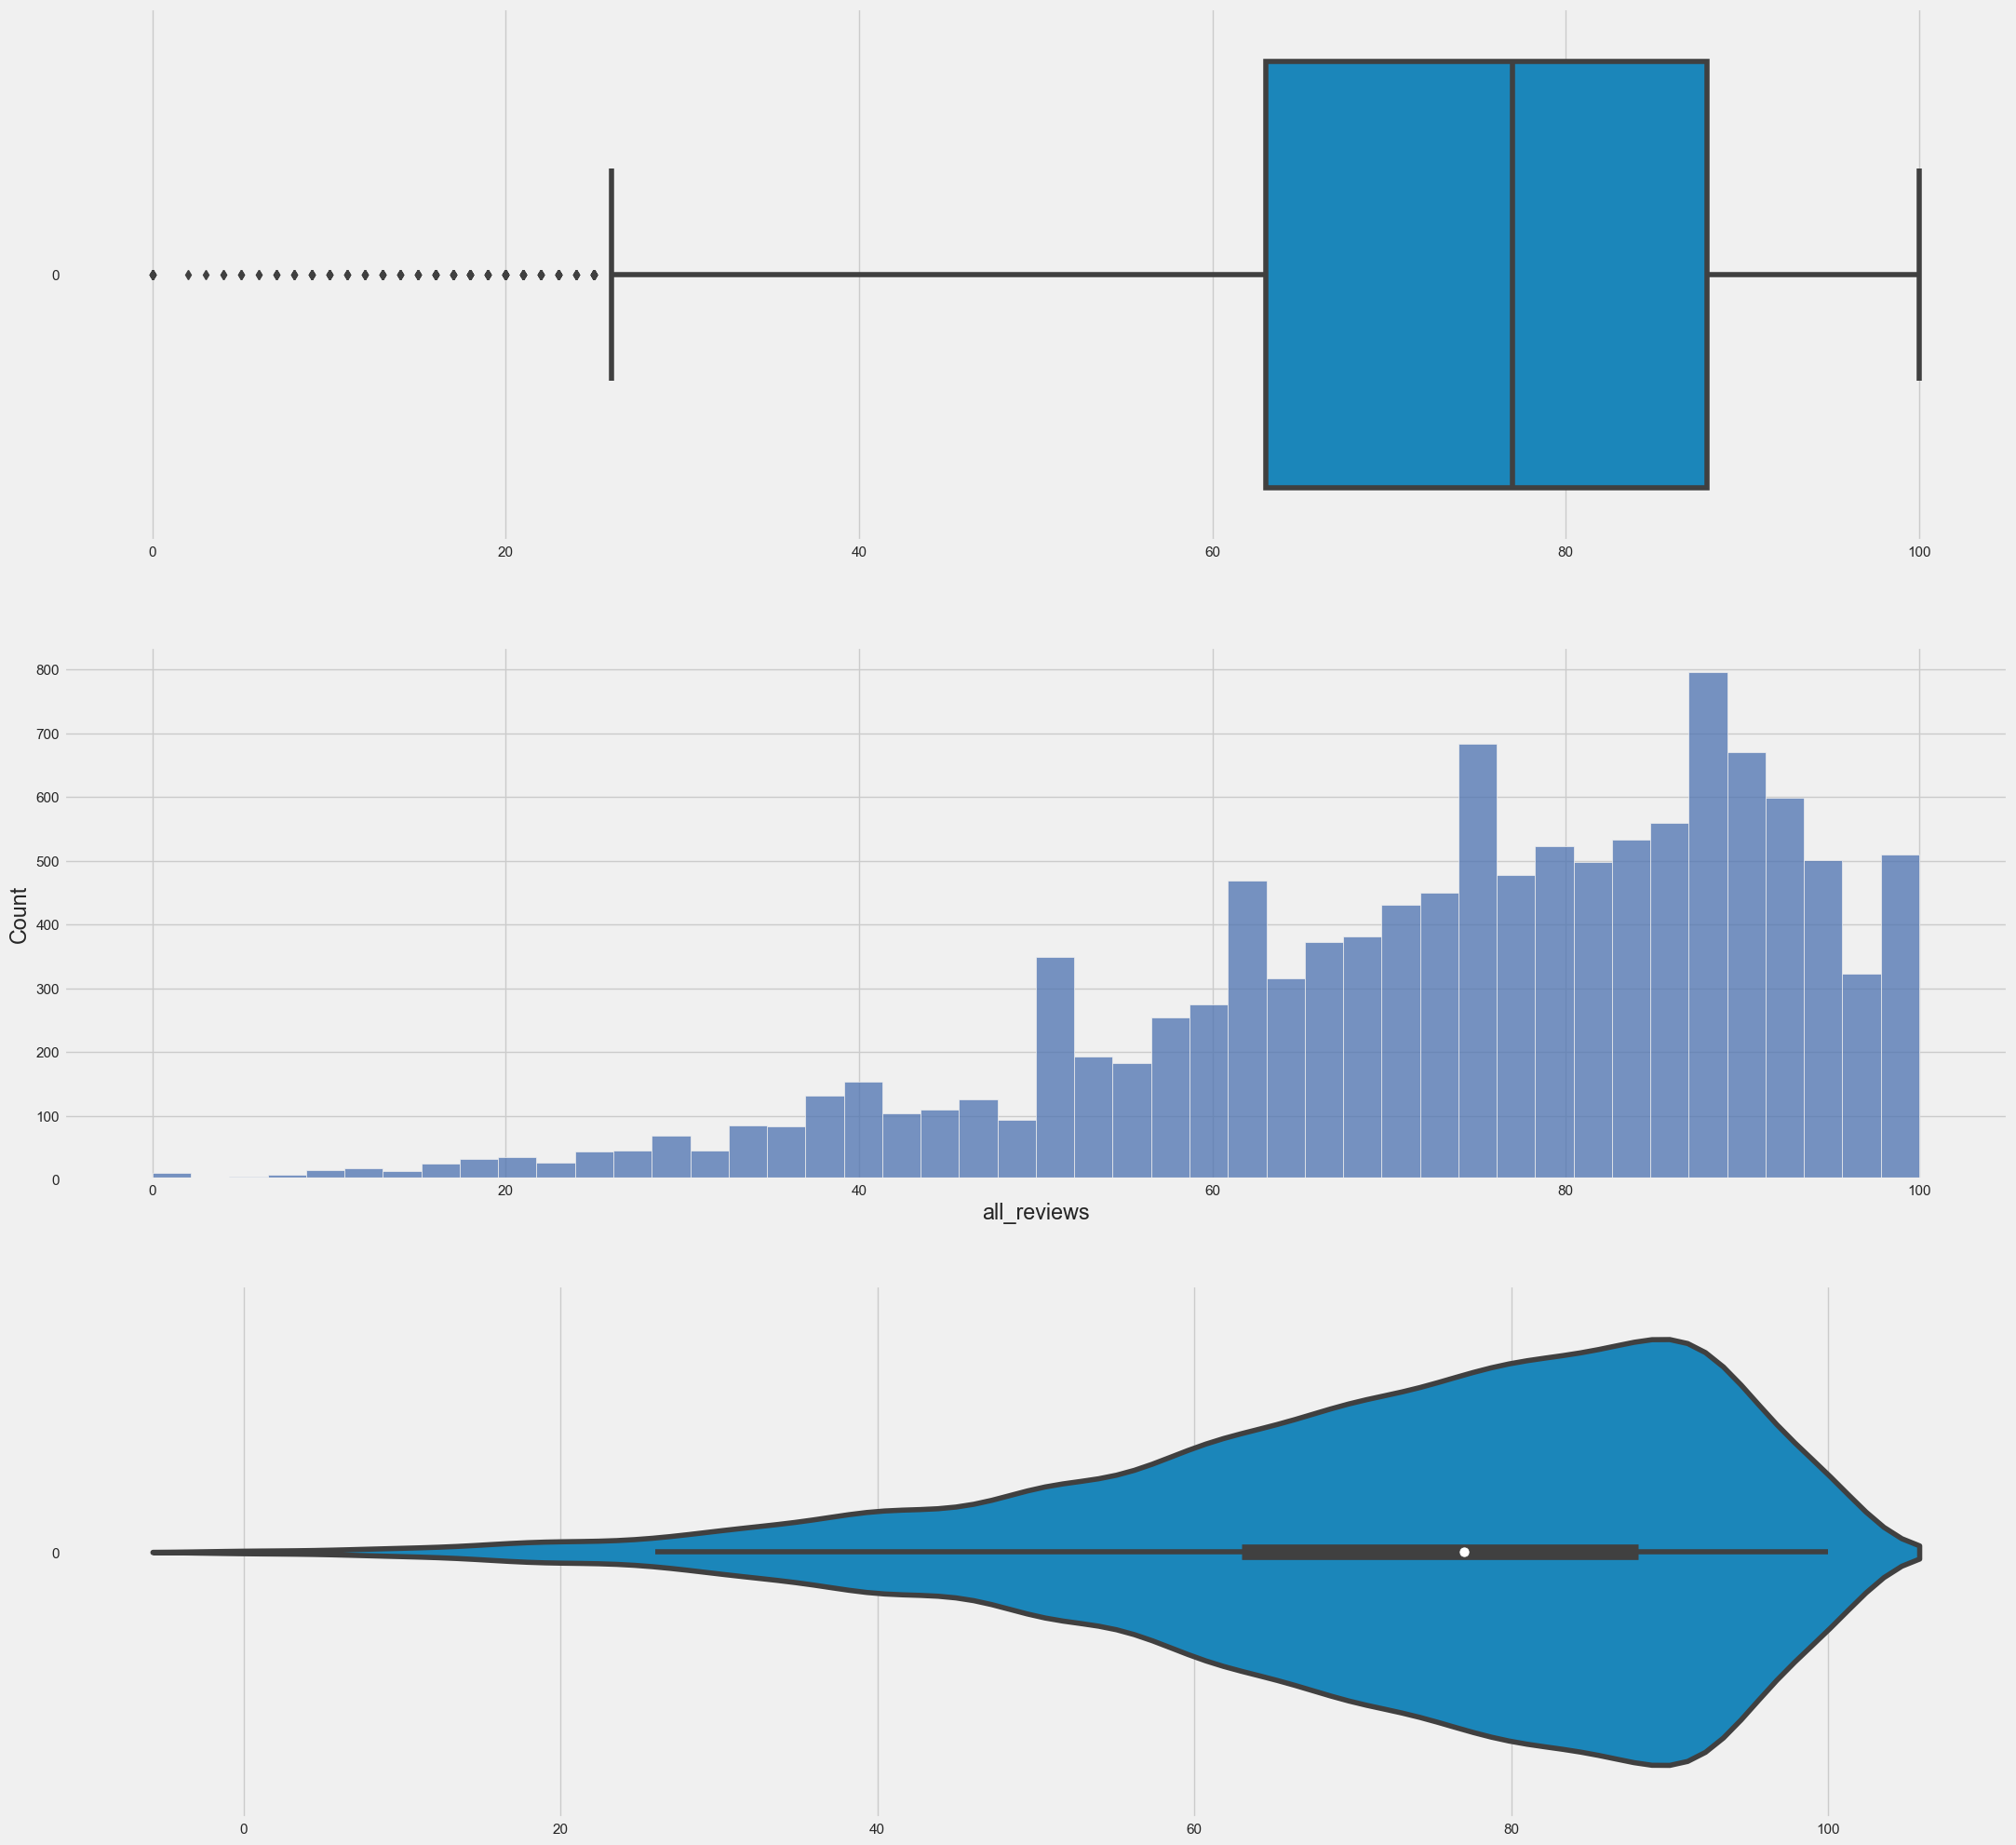

In [7]:
# Plots for all reviews
f, axes = plt.subplots(3,figsize=(24, 24))
sb.boxplot(data = games['all_reviews'], orient = "h", ax = axes[0])
sb.histplot(data = games['all_reviews'],ax = axes[1])
sb.violinplot(data = games['all_reviews'], orient = "h", ax = axes[2])

Steam's game rating system designates games with a review score of `70 or above` as "Mostly Positive" or above; thus, we classify games with a rating of 70 or higher as good games, i.e., `recommend = True`, otherwise recommend = False.

## Recommend

<Figure size 1200x300 with 0 Axes>

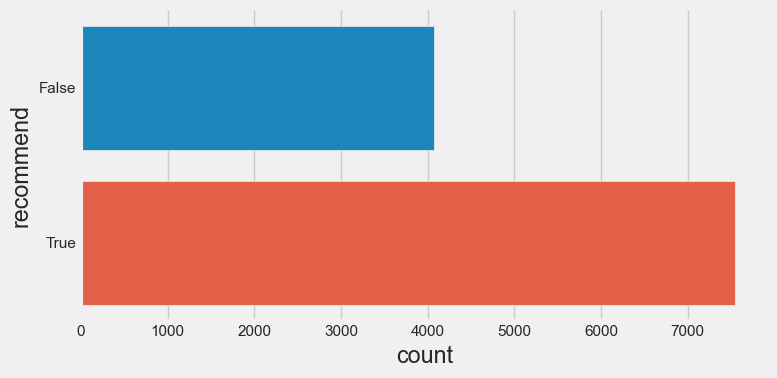

In [8]:
# Recommend's distribution
f = plt.figure(figsize=(12, 3))
sb.catplot(y = "recommend", data = games, kind = "count", height = 4, aspect = 2) 

# Numerical data

In [9]:
# Numerical data
numericalgames = games[['all_reviews', 'original_price', 'discount_price', 'discount_percentage']]
numericalgames.head()


,all_reviews,original_price,discount_price,discount_percentage
0,92,19.99,14.99,25.012506
1,49,29.99,29.99,0.000000
2,71,39.99,39.99,0.000000
3,61,44.99,44.99,0.000000
4,74,0.00,0.00,0.000000


Text(0.5, 0, 'discount_percentage')

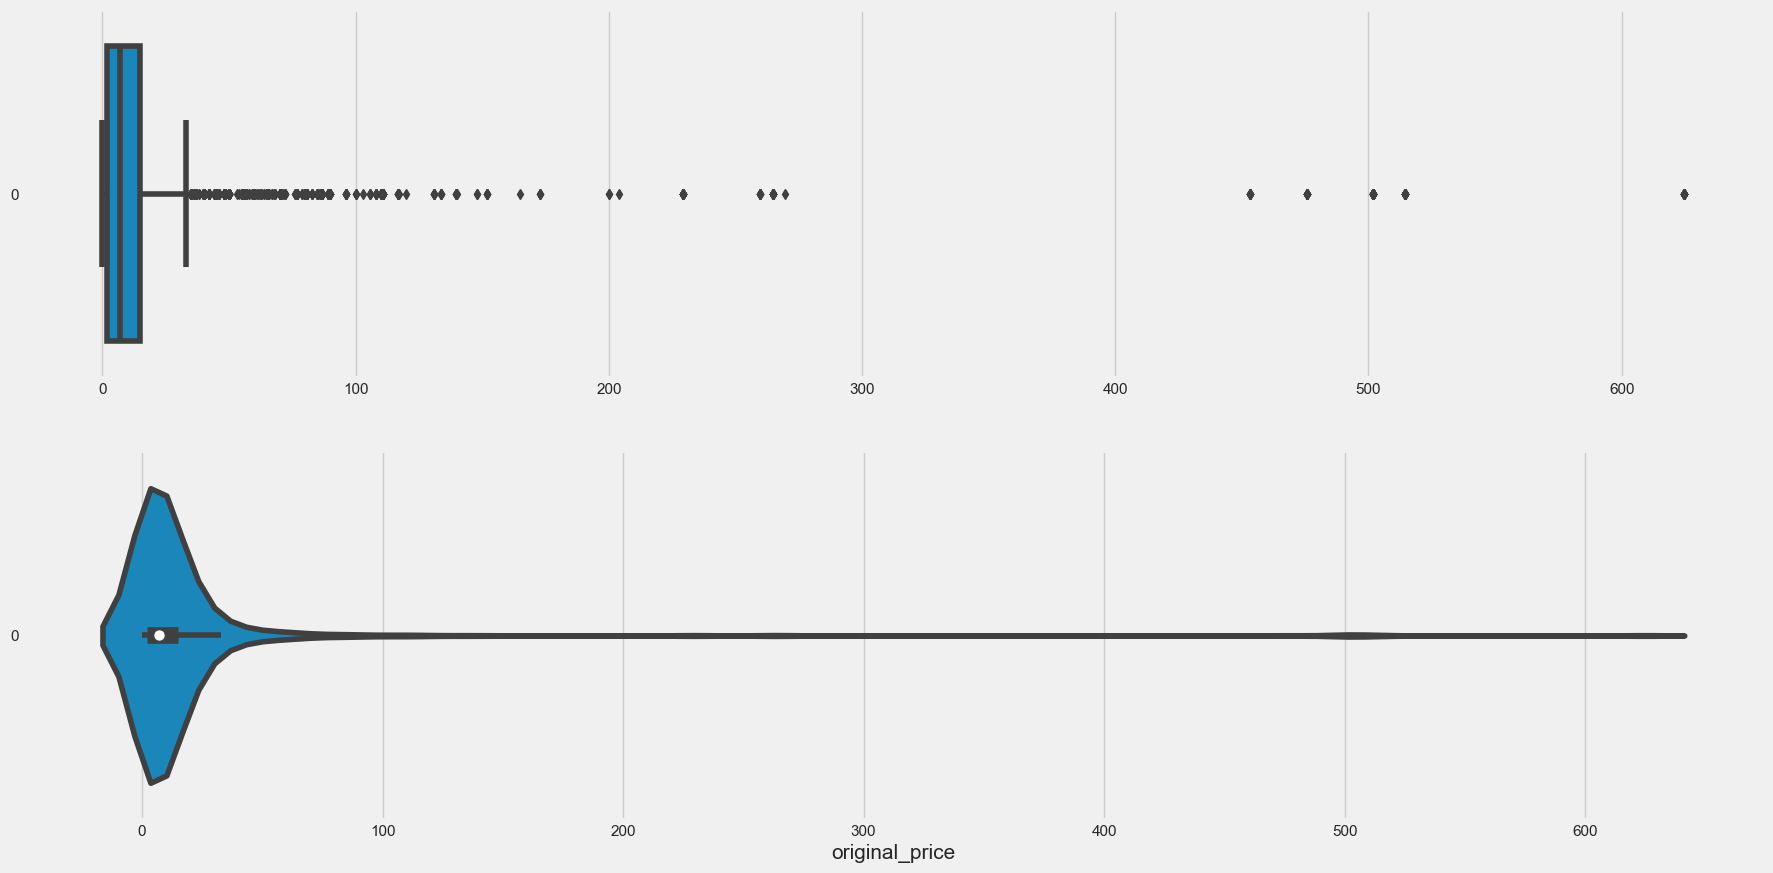

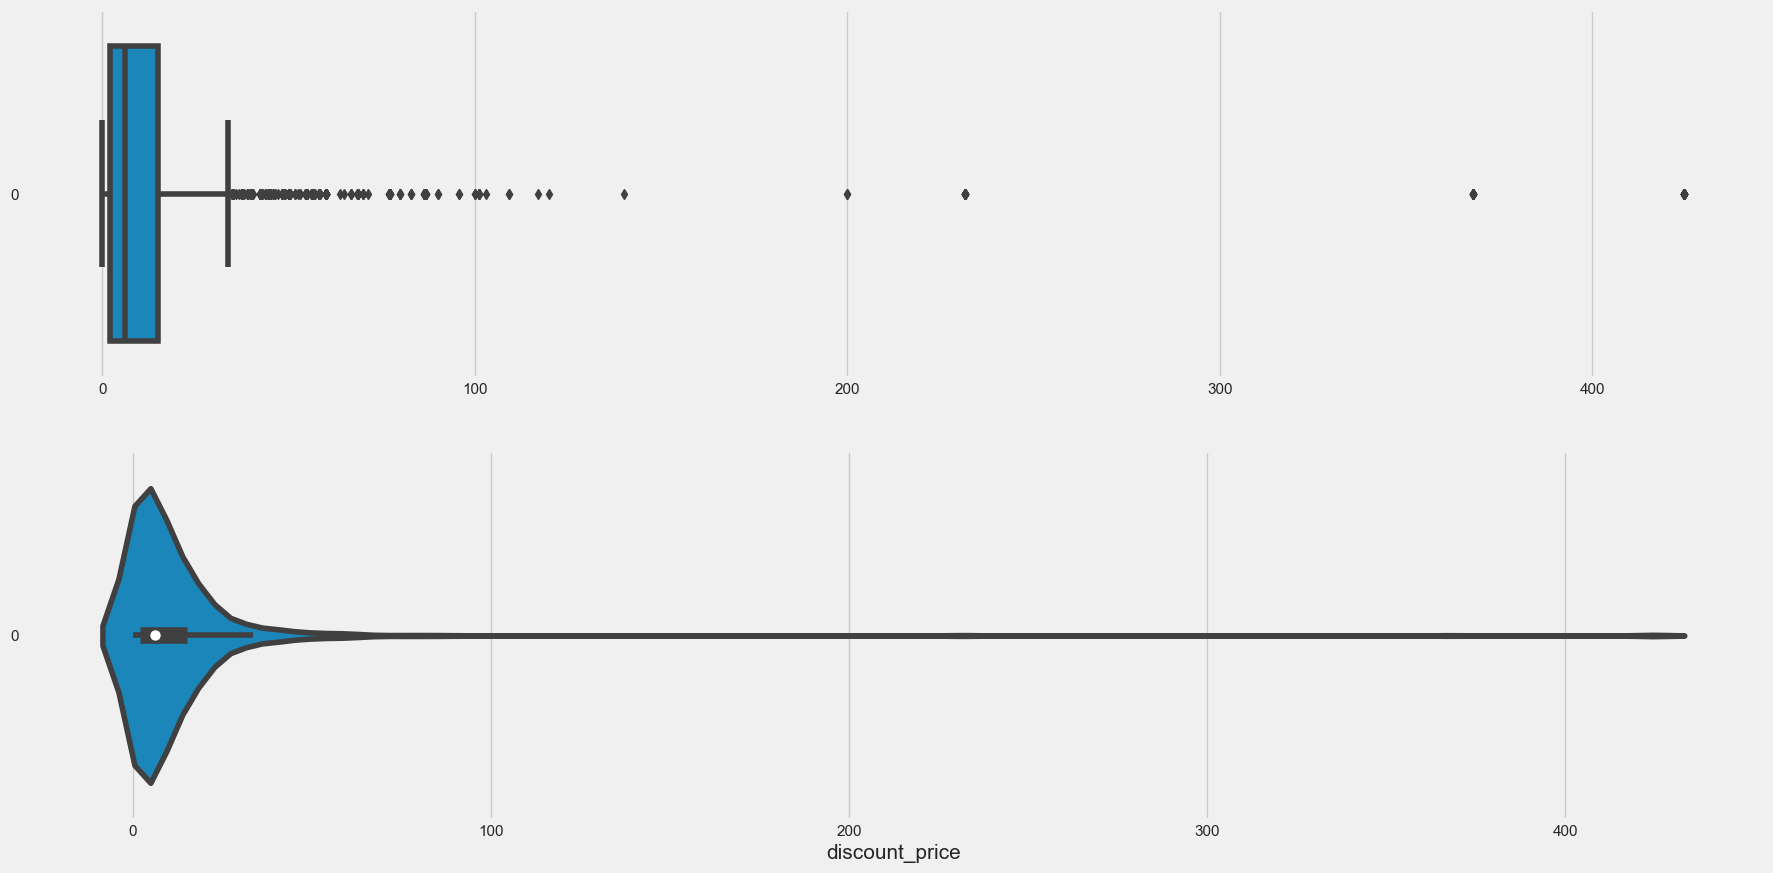

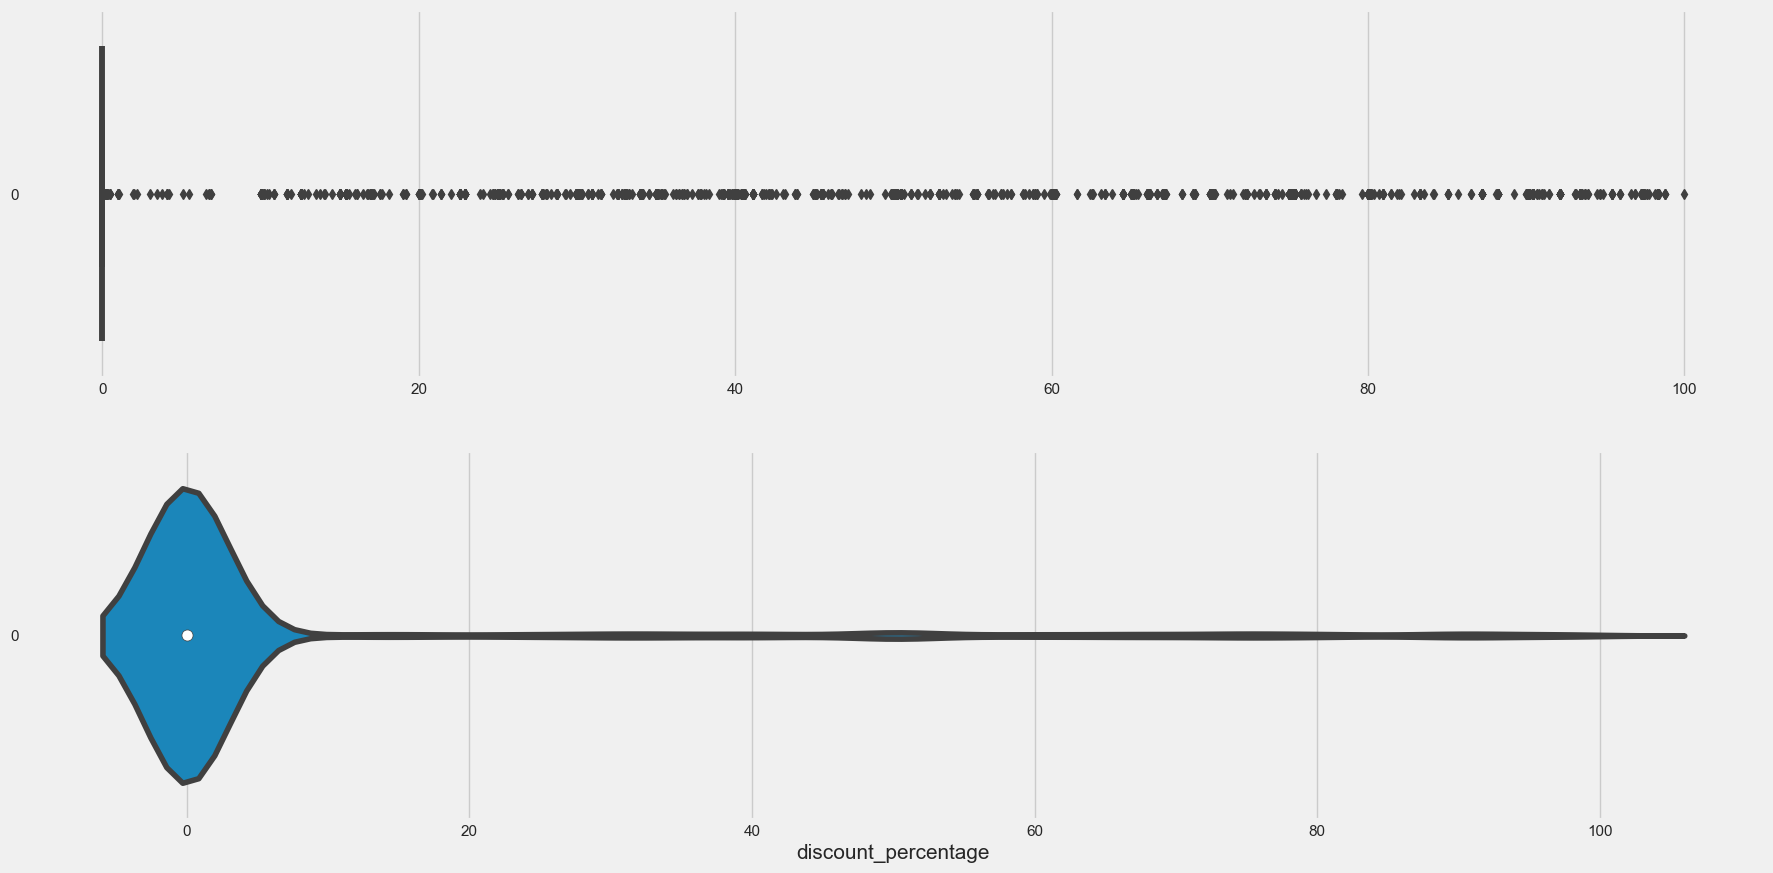

In [10]:
# Plots for original_price
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['original_price'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['original_price'], orient = "h", ax = axes[1])
axes[1].set_xlabel('original_price',fontsize=15)

# Plots for discount_price
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['discount_price'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['discount_price'], orient = "h", ax = axes[1])
axes[1].set_xlabel('discount_price',fontsize=15)

# Plots for discount_percentage
f, axes = plt.subplots(2,1,figsize=(20,10))

sb.boxplot(data = numericalgames['discount_percentage'], orient = "h", ax = axes[0])
sb.violinplot(data = numericalgames['discount_percentage'], orient = "h", ax = axes[1])
axes[1].set_xlabel('discount_percentage',fontsize=15)

### Relationship between `numerical predictors` and `all reviews`, and between `numerical predictors` and `recommend`

In [11]:
numericalgames.corr()

,all_reviews,original_price,discount_price,discount_percentage
all_reviews,1.000000,0.001006,0.018958,-0.035278
original_price,0.001006,1.000000,0.658805,0.417969
discount_price,0.018958,0.658805,1.000000,0.066322
discount_percentage,-0.035278,0.417969,0.066322,1.000000


<AxesSubplot:>

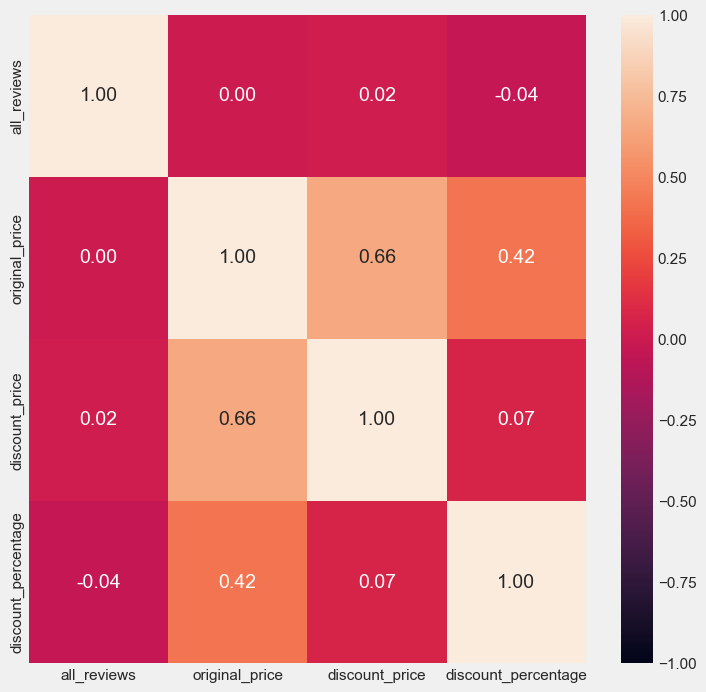

In [12]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(8,8))
sb.heatmap(numericalgames.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

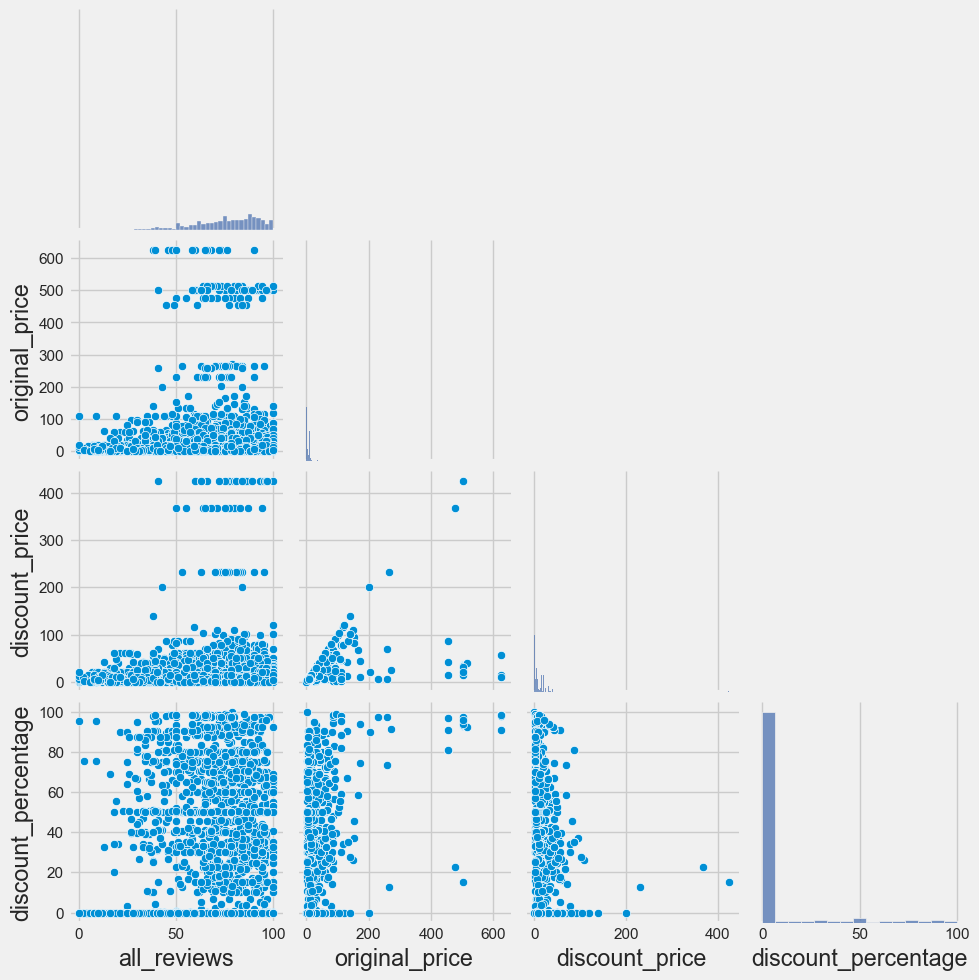

In [13]:
sb.pairplot(data = numericalgames, corner = True)

Based on the heatmap, the linear correlation between "all_reviews" and the other numerical variables appears to be extremely low, with all correlations falling below 0.03, and "discount_percentage" displaying the highest correlation at 0.03. These results suggest that there is a poor linear relationship between these variables and "all_reviews." However, it is possible that non-linear relationships exist between these variables. Therefore, we shall also explore non-linear models.

<AxesSubplot:xlabel='discount_percentage', ylabel='recommend'>

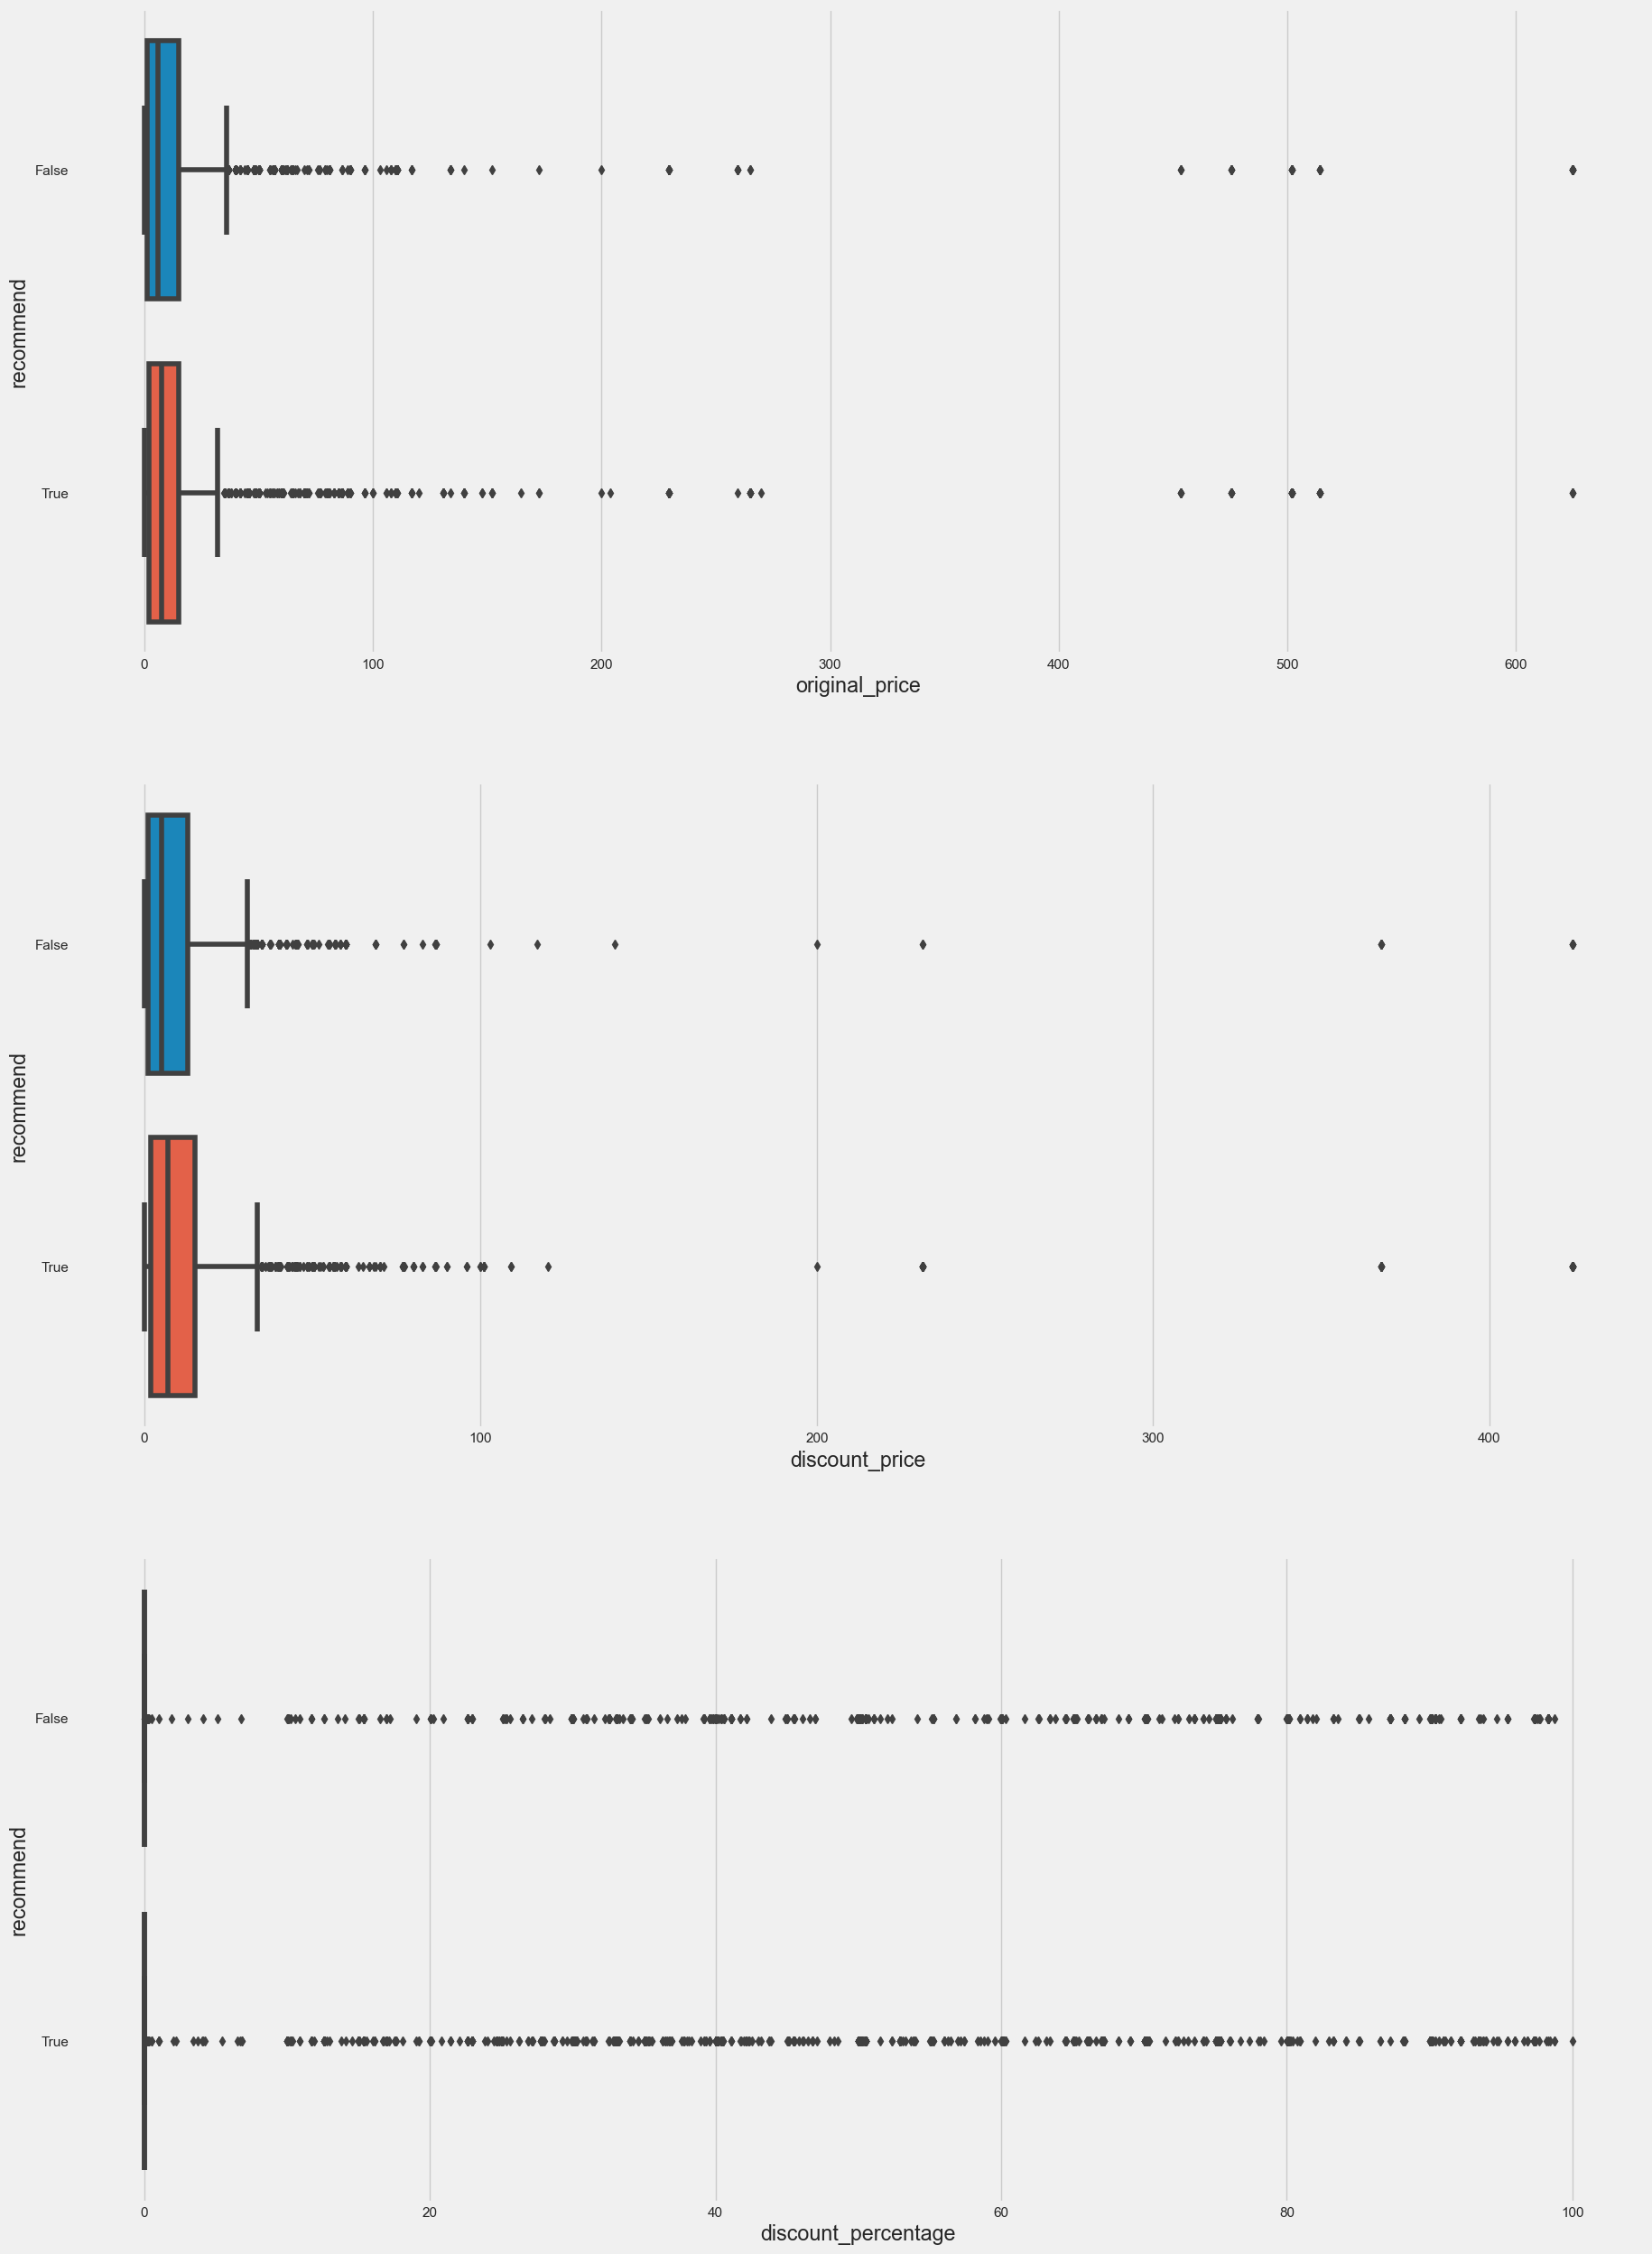

In [14]:
# Numerical predictors vs Recommend

f, axes = plt.subplots(3,1,figsize=(20,30))

# Original Price vs Recommend
sb.boxplot(x= 'original_price', y = 'recommend', data = games, orient = 'h', ax = axes[0])

# Discount Price vs Recommend
sb.boxplot(x= 'discount_price', y = 'recommend', data = games, orient = 'h', ax = axes[1])

# Discount Percentage vs Recommend
sb.boxplot(x= 'discount_percentage', y = 'recommend', data = games, orient = 'h', ax = axes[2])

# Categorical data

In [15]:
categorical_games = games[[
 'recommend', 'mature_content', 
 'genre_Action',
 'genre_Adventure',
 'genre_Casual',
 'genre_Massively Multiplayer',
 'genre_RPG',
 'genre_Racing',
 'genre_Simulation',
 'genre_Sports',
 'genre_Strategy',
 'developer', 'publisher', 'popular_tags']]
categorical_games.head()

,recommend,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,developer,publisher,popular_tags
0,True,False,1,0,0,0,0,0,0,0,0,id Software,Bethesda Softworks,"[FPS, Gore, Action, Demons, Shooter, First-Per..."
1,False,True,1,1,0,1,0,0,0,0,0,PUBG Corporation,PUBG Corporation,"[Survival, Shooter, Multiplayer, Battle Royale..."
2,True,False,1,1,0,0,0,0,0,0,1,Harebrained Schemes,Paradox Interactive,"[Mechs, Strategy, Turn-Based, Turn-Based Tacti..."
3,False,False,1,1,0,1,0,0,0,0,0,Bohemia Interactive,Bohemia Interactive,"[Survival, Zombies, Open World, Multiplayer, P..."
4,True,False,1,0,0,1,1,0,0,0,1,CCP,CCP,"[Space, Massively Multiplayer, Sci-fi, Sandbox..."


### Mature content

<Figure size 1200x300 with 0 Axes>

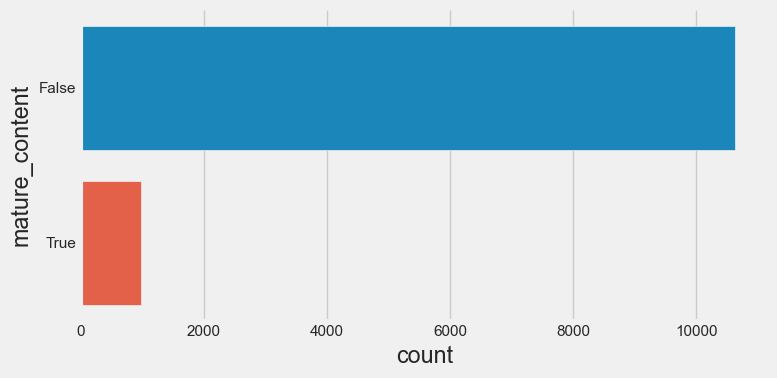

In [16]:
# Mature content 
f = plt.figure(figsize=(12, 3))
sb.catplot(y = "mature_content", data = categorical_games, kind = "count", height = 4, aspect = 2) 

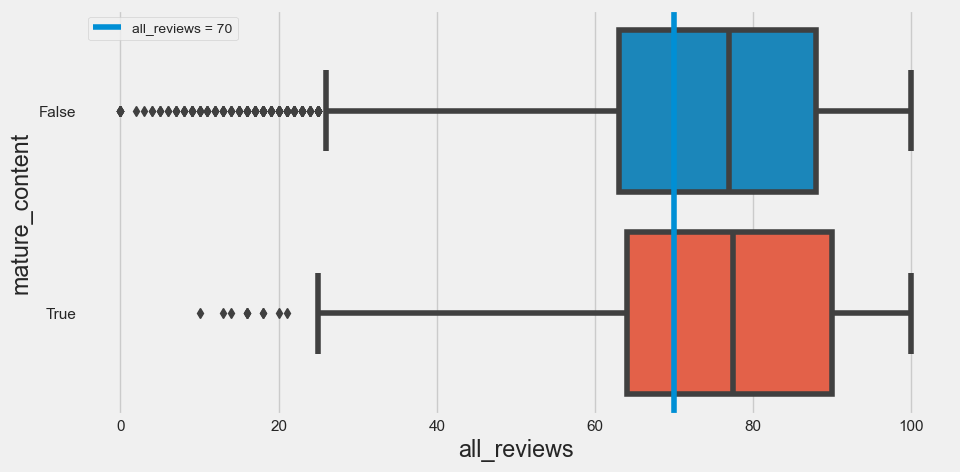

In [17]:
# Mature content vs all reviews

f = plt.figure(figsize=(10, 5))
sb.boxplot(x = "all_reviews", y = "mature_content", data = games, orient = "h", width = 0.8)
plt.axvline(70, label= "all_reviews = 70")
plt.legend(fontsize=10)
plt.show()

<AxesSubplot:xlabel='mature_content', ylabel='recommend'>

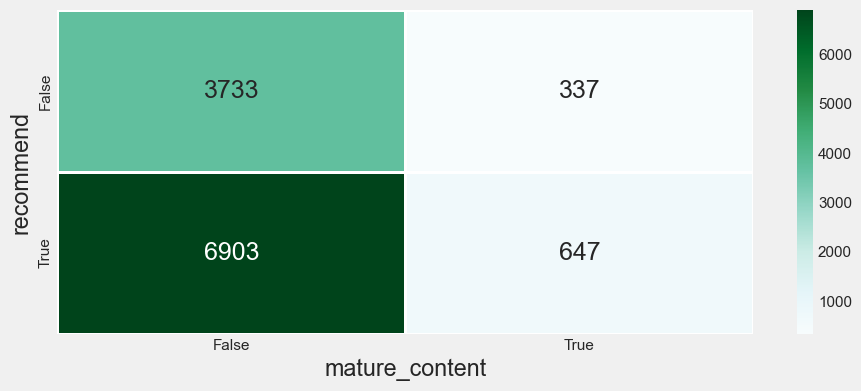

In [18]:
# Mature content vs Recommend
f = plt.figure(figsize=(10, 4))
sb.heatmap(categorical_games.groupby(['recommend', 'mature_content']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

### Genre

In [19]:
# All genre 
allgenre = categorical_games.filter(regex='^genre_')
print("Dimension of allgenre: ", allgenre.shape)


Dimension of allgenre:  (11620, 9)


In [20]:
list(allgenre)

['genre_Action',
 'genre_Adventure',
 'genre_Casual',
 'genre_Massively Multiplayer',
 'genre_RPG',
 'genre_Racing',
 'genre_Simulation',
 'genre_Sports',
 'genre_Strategy']

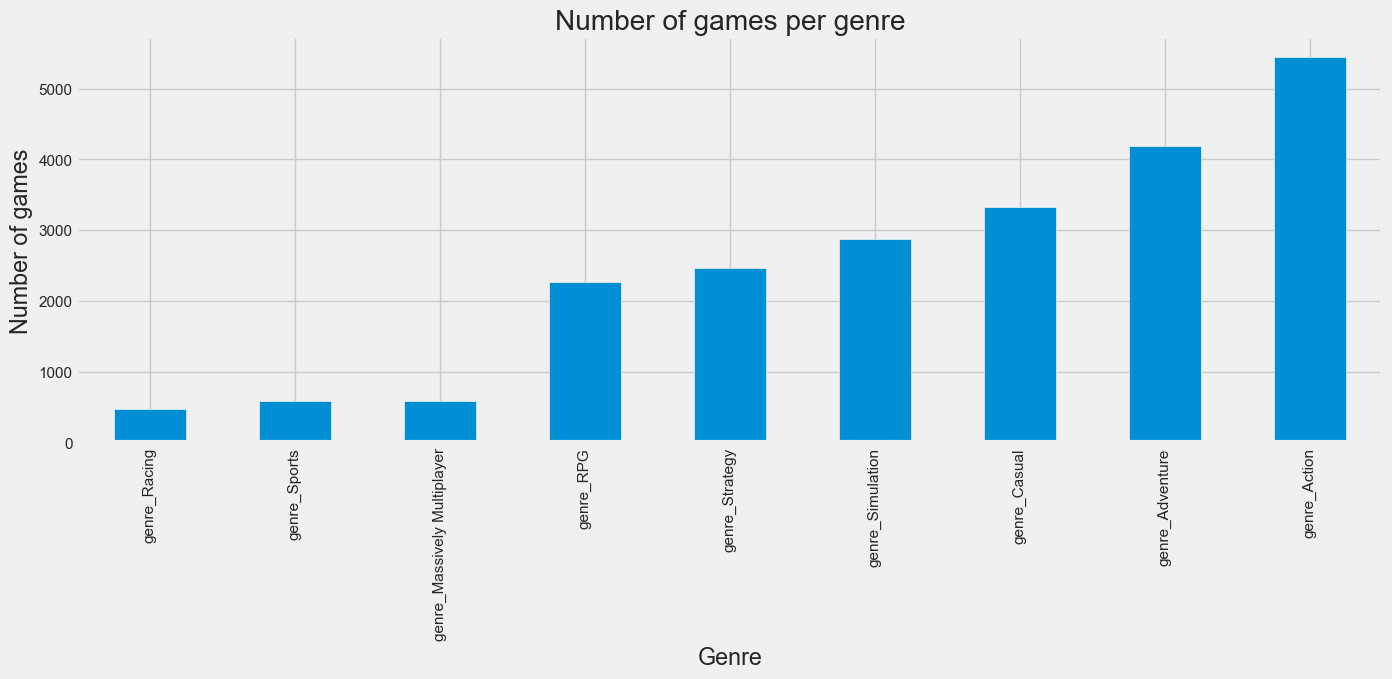

In [21]:
# All genre 
allgenre_sum_sorted = allgenre.sum().sort_values()

# create a bar chart
fig, ax = plt.subplots(figsize=(15, 5))
allgenre_sum_sorted.plot(kind='bar', ax=ax)

# set plot labels
ax.set_title('Number of games per genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of games')

# show the plot
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:257: FutureWarning: In a future version, passing a SparseArray to pd.Index will store that array directly instead of converting to a dense numpy ndarray. To retain the old behavior, use pd.Index(arr.to_numpy()) instead
  g_vals = grouped_vals.get_group(g)
C:\ProgramData\Anaconda3\lib\site-

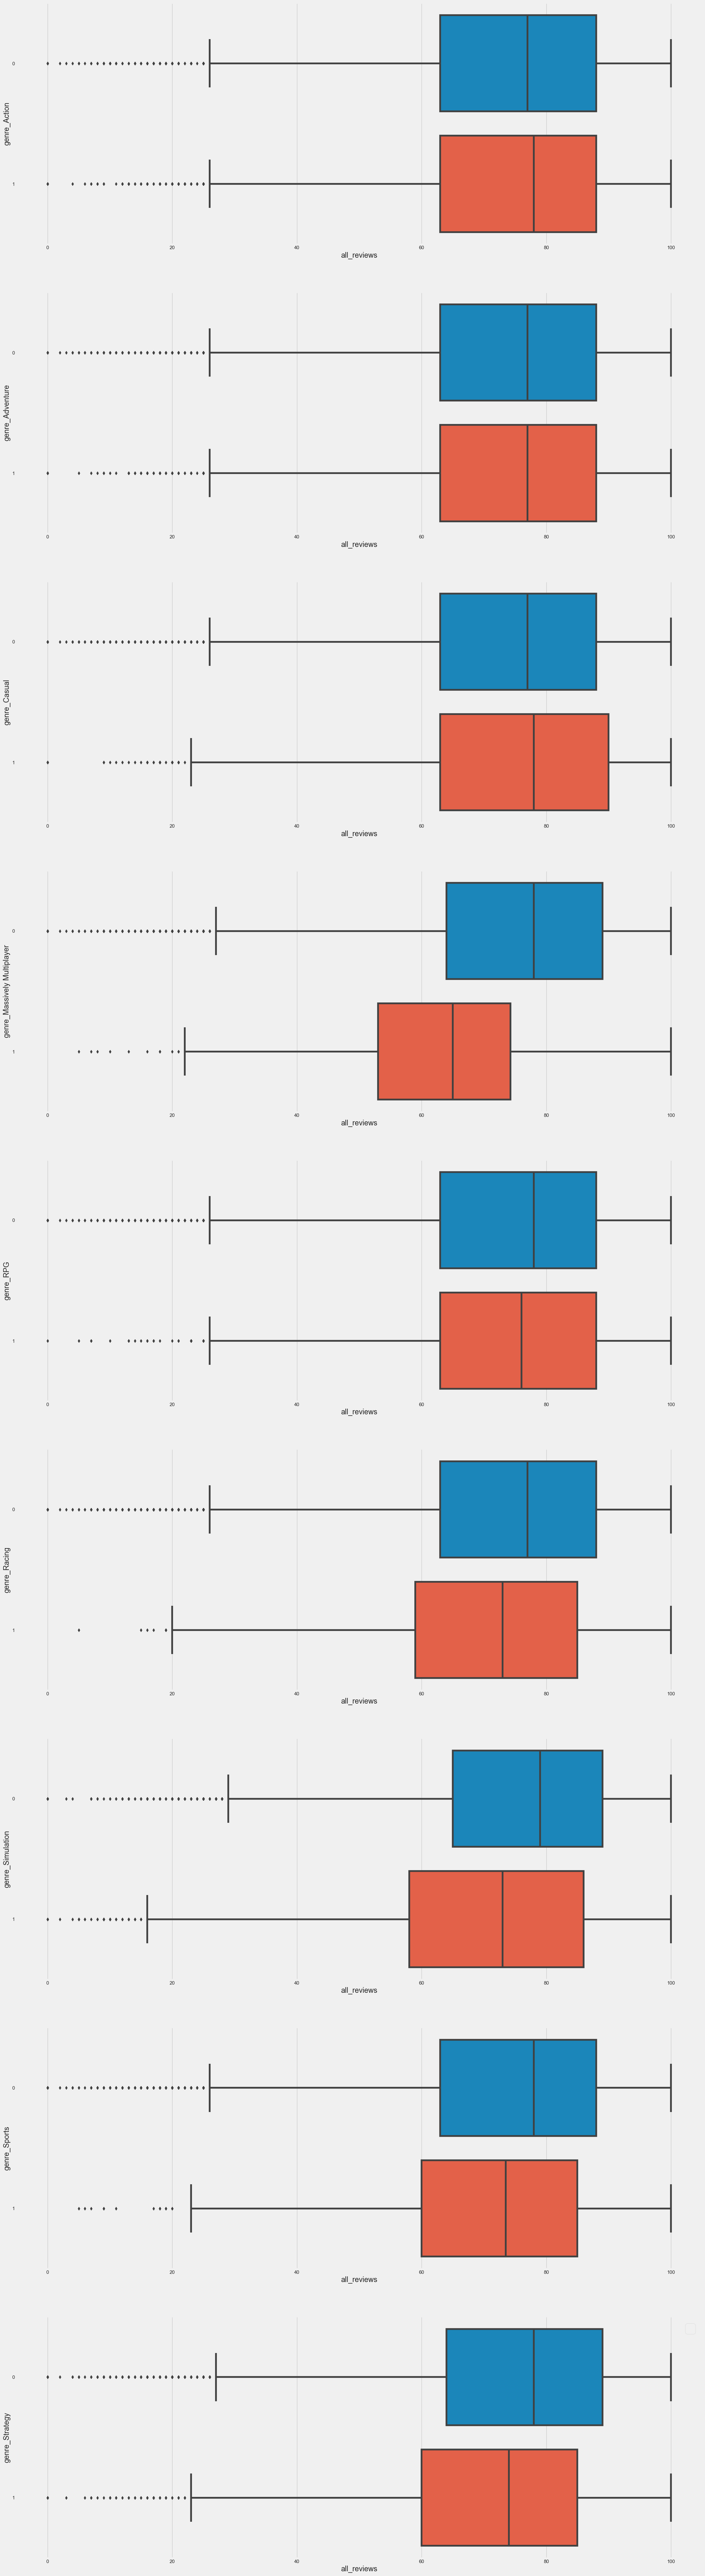

In [22]:
# All genre vs all reviews

# Concatenate all genre with all reviews
genre_reviews = pd.concat([allgenre, pd.DataFrame(games['all_reviews'])], axis = 1)

f, axes = plt.subplots(9, 1, figsize=(25, 100))

i=0
for thegenre in allgenre:
    sb.boxplot(x = "all_reviews", y = thegenre , data = genre_reviews, orient = "h", width = 0.8, ax = axes[i])
    i+=1


plt.legend(fontsize=30)


### Developer

In [23]:
categorical_games['developer'].value_counts()

Dovetail Games                77
KOEI TECMO GAMES CO., LTD.    58
Choice of Games               56
SCS Software                  42
CAPCOM Co., Ltd.              33
                              ..
Shadow Planet Productions      1
Shawn Beck                     1
cbritez                        1
Apparition Games               1
Phoesion                       1
Name: developer, Length: 7631, dtype: int64

There are many different developer found in this dataset, so we will only be looking at developer who had developed at least 30 games so that it would be at least follow a normal distribution via central limit theorem.

In [24]:
(categorical_games['developer'].value_counts() >= 30).sum()

7

In [25]:
value_counts = categorical_games['developer'].value_counts()
to_change = value_counts[value_counts >= 30].index

moredeveloper = games[games['developer'].isin(to_change)]
moredeveloper['developer'].value_counts()

Dovetail Games                77
KOEI TECMO GAMES CO., LTD.    58
Choice of Games               56
SCS Software                  42
CAPCOM Co., Ltd.              33
Arc System Works              31
RewindApp                     30
Name: developer, dtype: int64

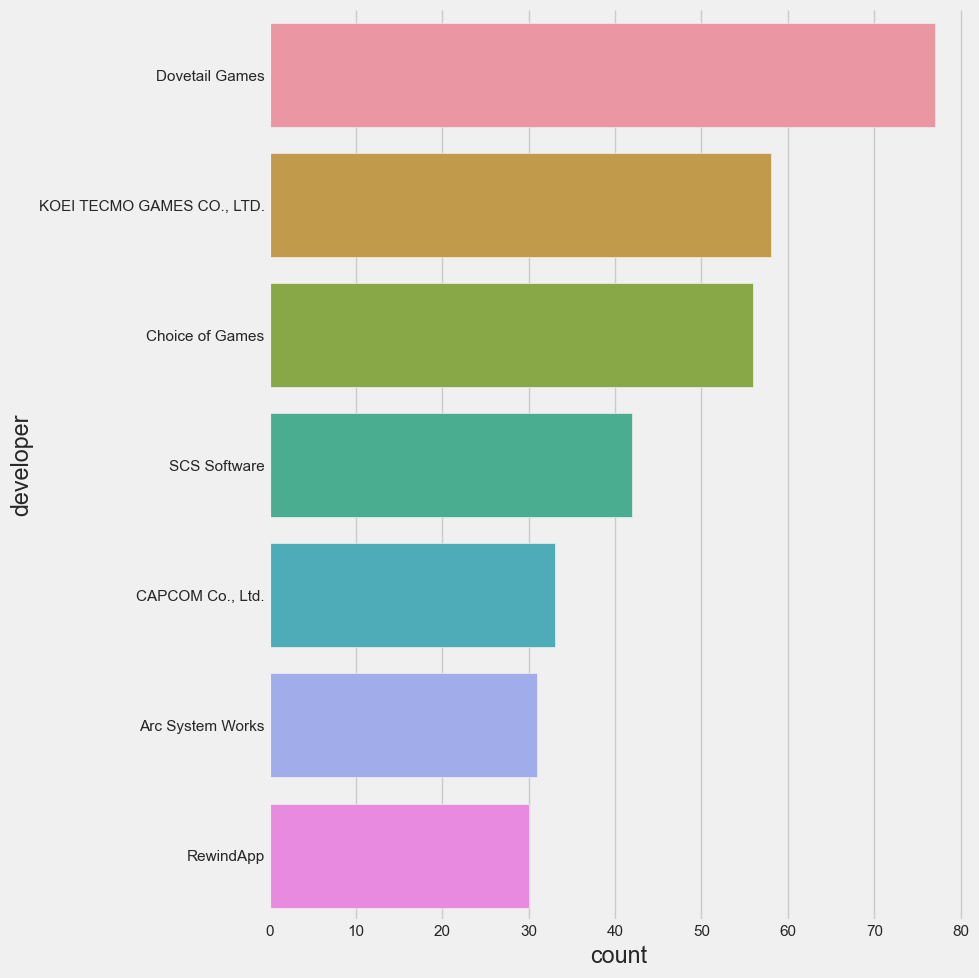

In [26]:
sb.catplot(y = "developer", data = moredeveloper, kind = "count", order = moredeveloper['developer'].value_counts().index, height = 10)

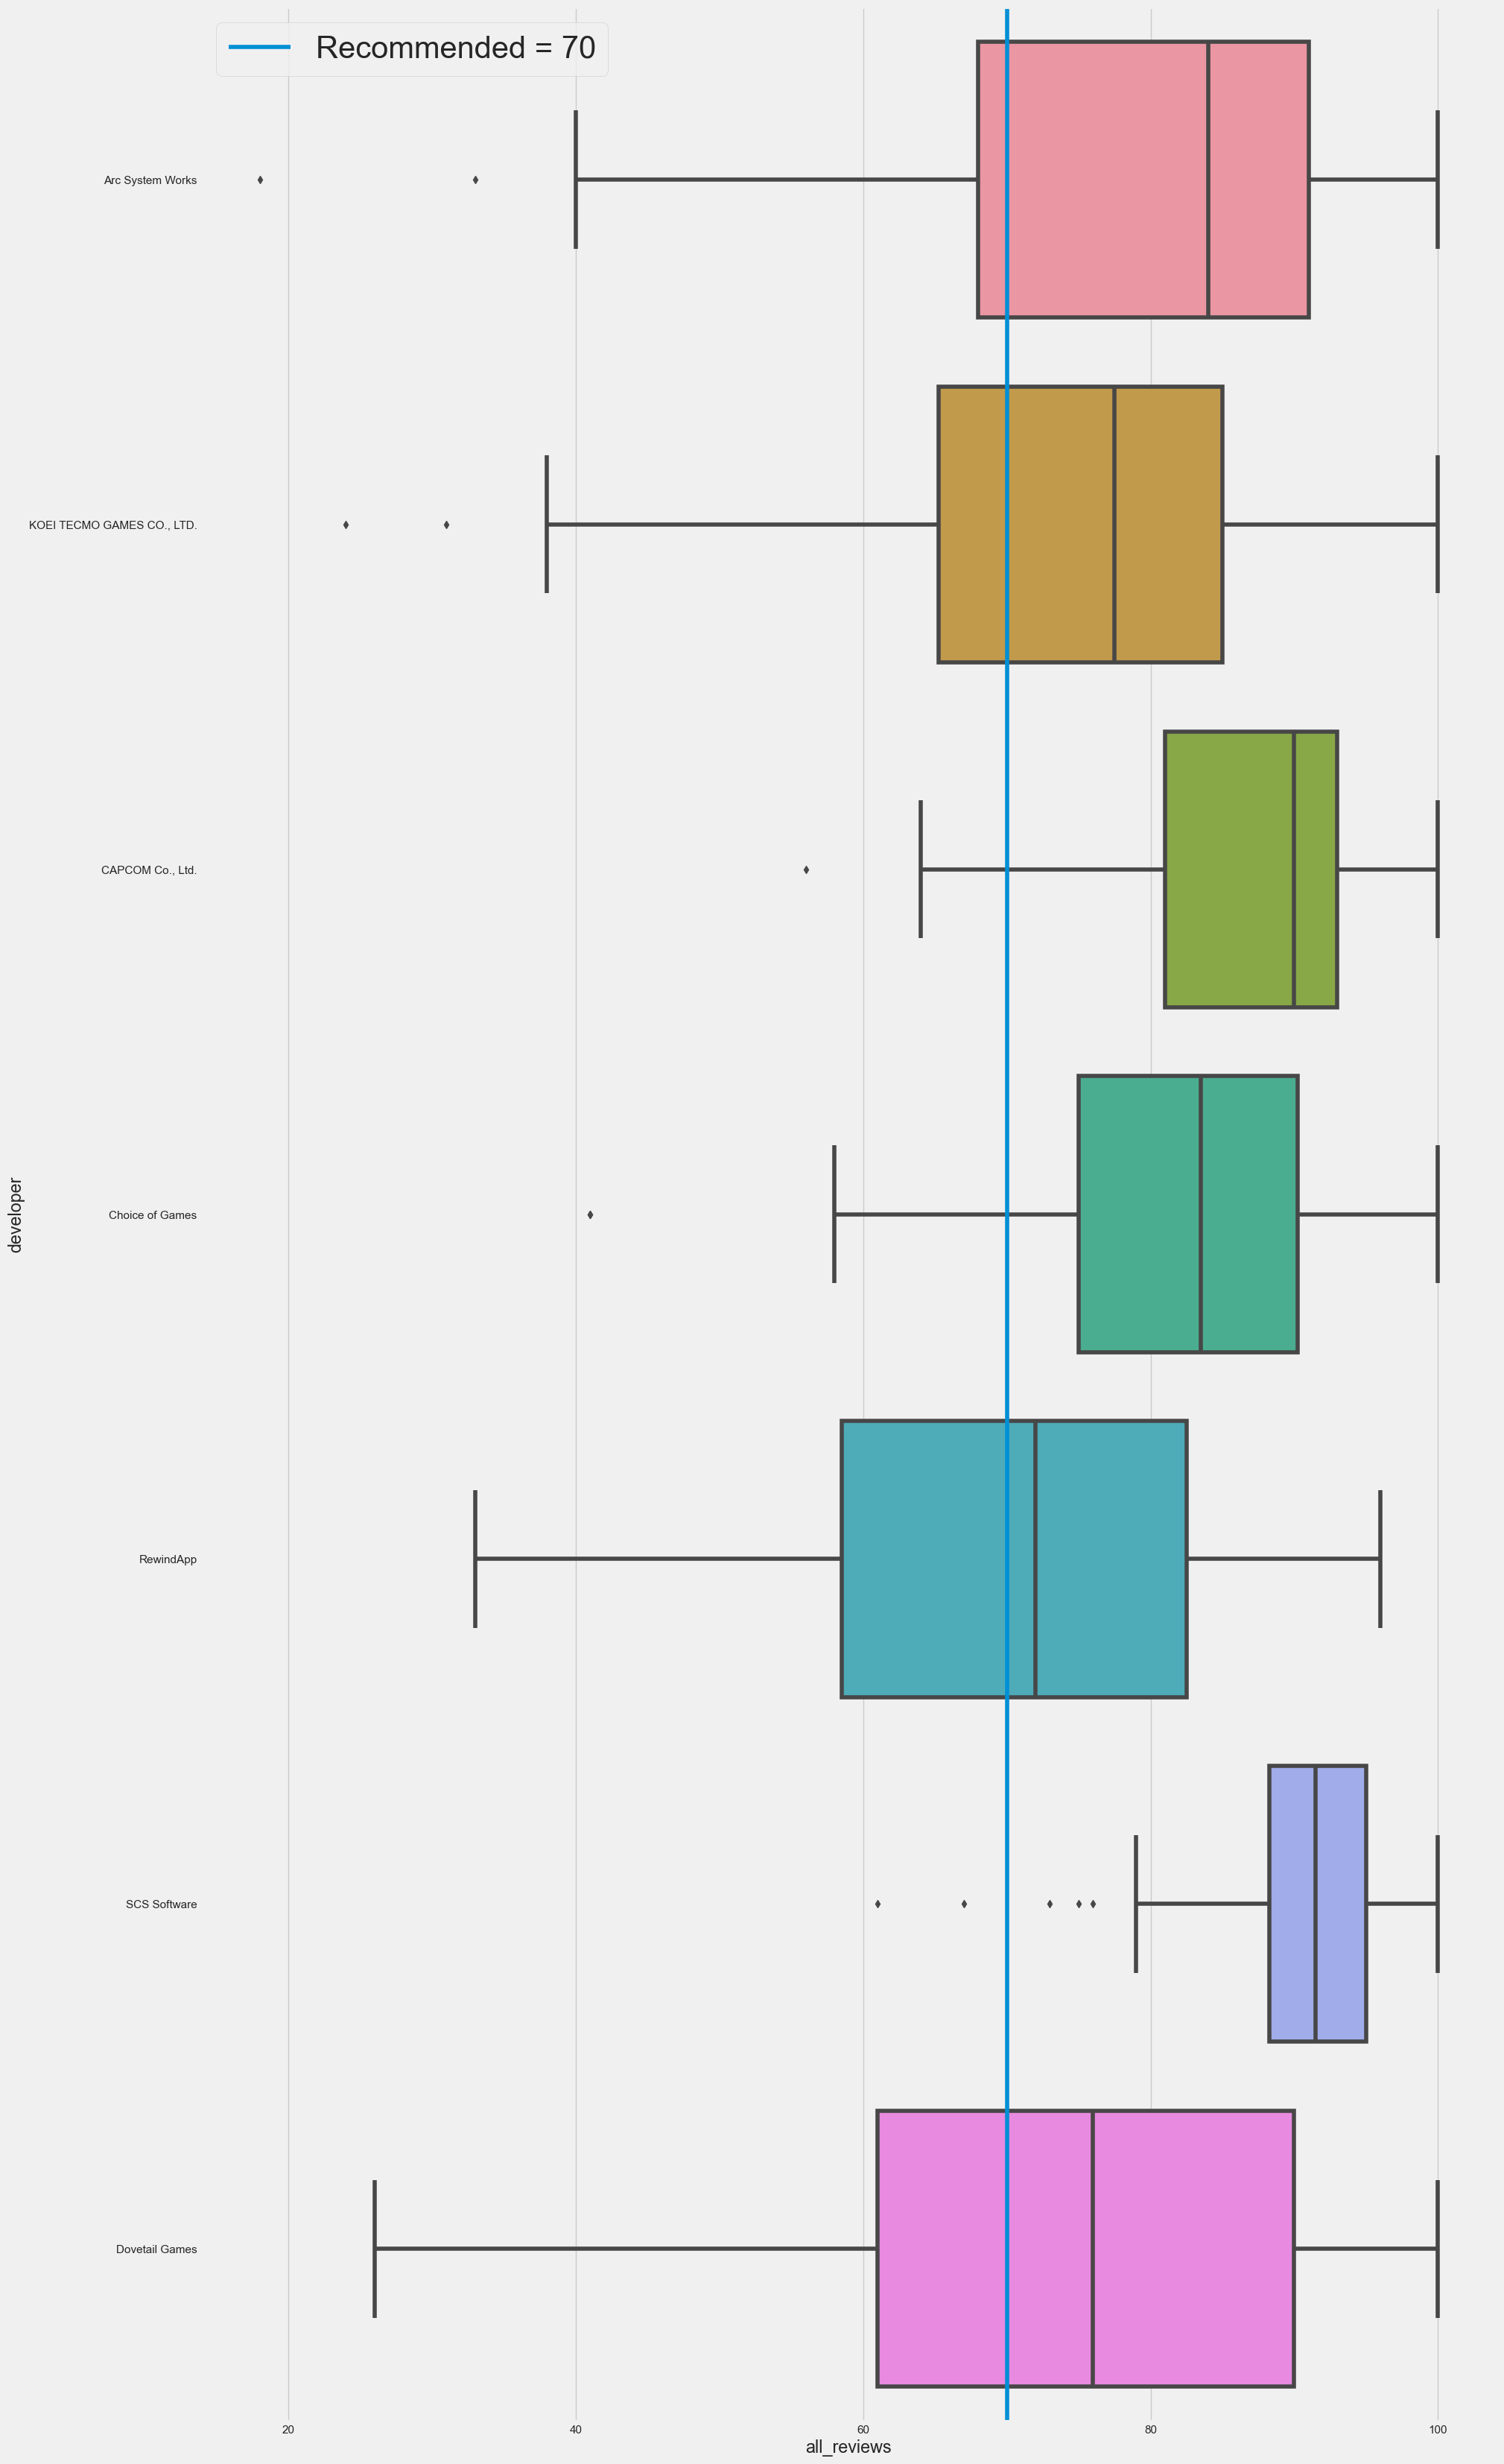

In [27]:
# Developer vs All reviews

f = plt.figure(figsize=(20, 40))
sb.boxplot(x = "all_reviews", y = "developer", data = moredeveloper, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("all_reviews",fontsize=30)
ax.set_ylabel("developer",fontsize=30)
plt.axvline(70, label= "Recommended = 70")
plt.legend(fontsize=30)
plt.show()

From the data, we see that the SCS Software developer's 25 percentile, median, 75 percentile all_reviews are the highest compared to others 25 percentile, median, 75 percentile all_reviews. 


### Publisher

In [28]:
print("Number of unique publisher: ", games['publisher'].nunique())
print("Number of unique publisher who published more than 30 games: ", (games['publisher'].value_counts() >=30).sum())

Number of unique publisher:  6188
Number of unique publisher who published more than 30 games:  32


There are many different `publisher` found in this dataset, it is difficult to show all publishers at here. Thus, we will only be looking at publisher who had published at `least 30` games so that it would be at least follow a normal distribution via central limit theorem.

In [29]:
value_counts = games['publisher'].value_counts()
to_change = value_counts[value_counts >= 30].index
morepublisher = games[games['publisher'].isin(to_change)]

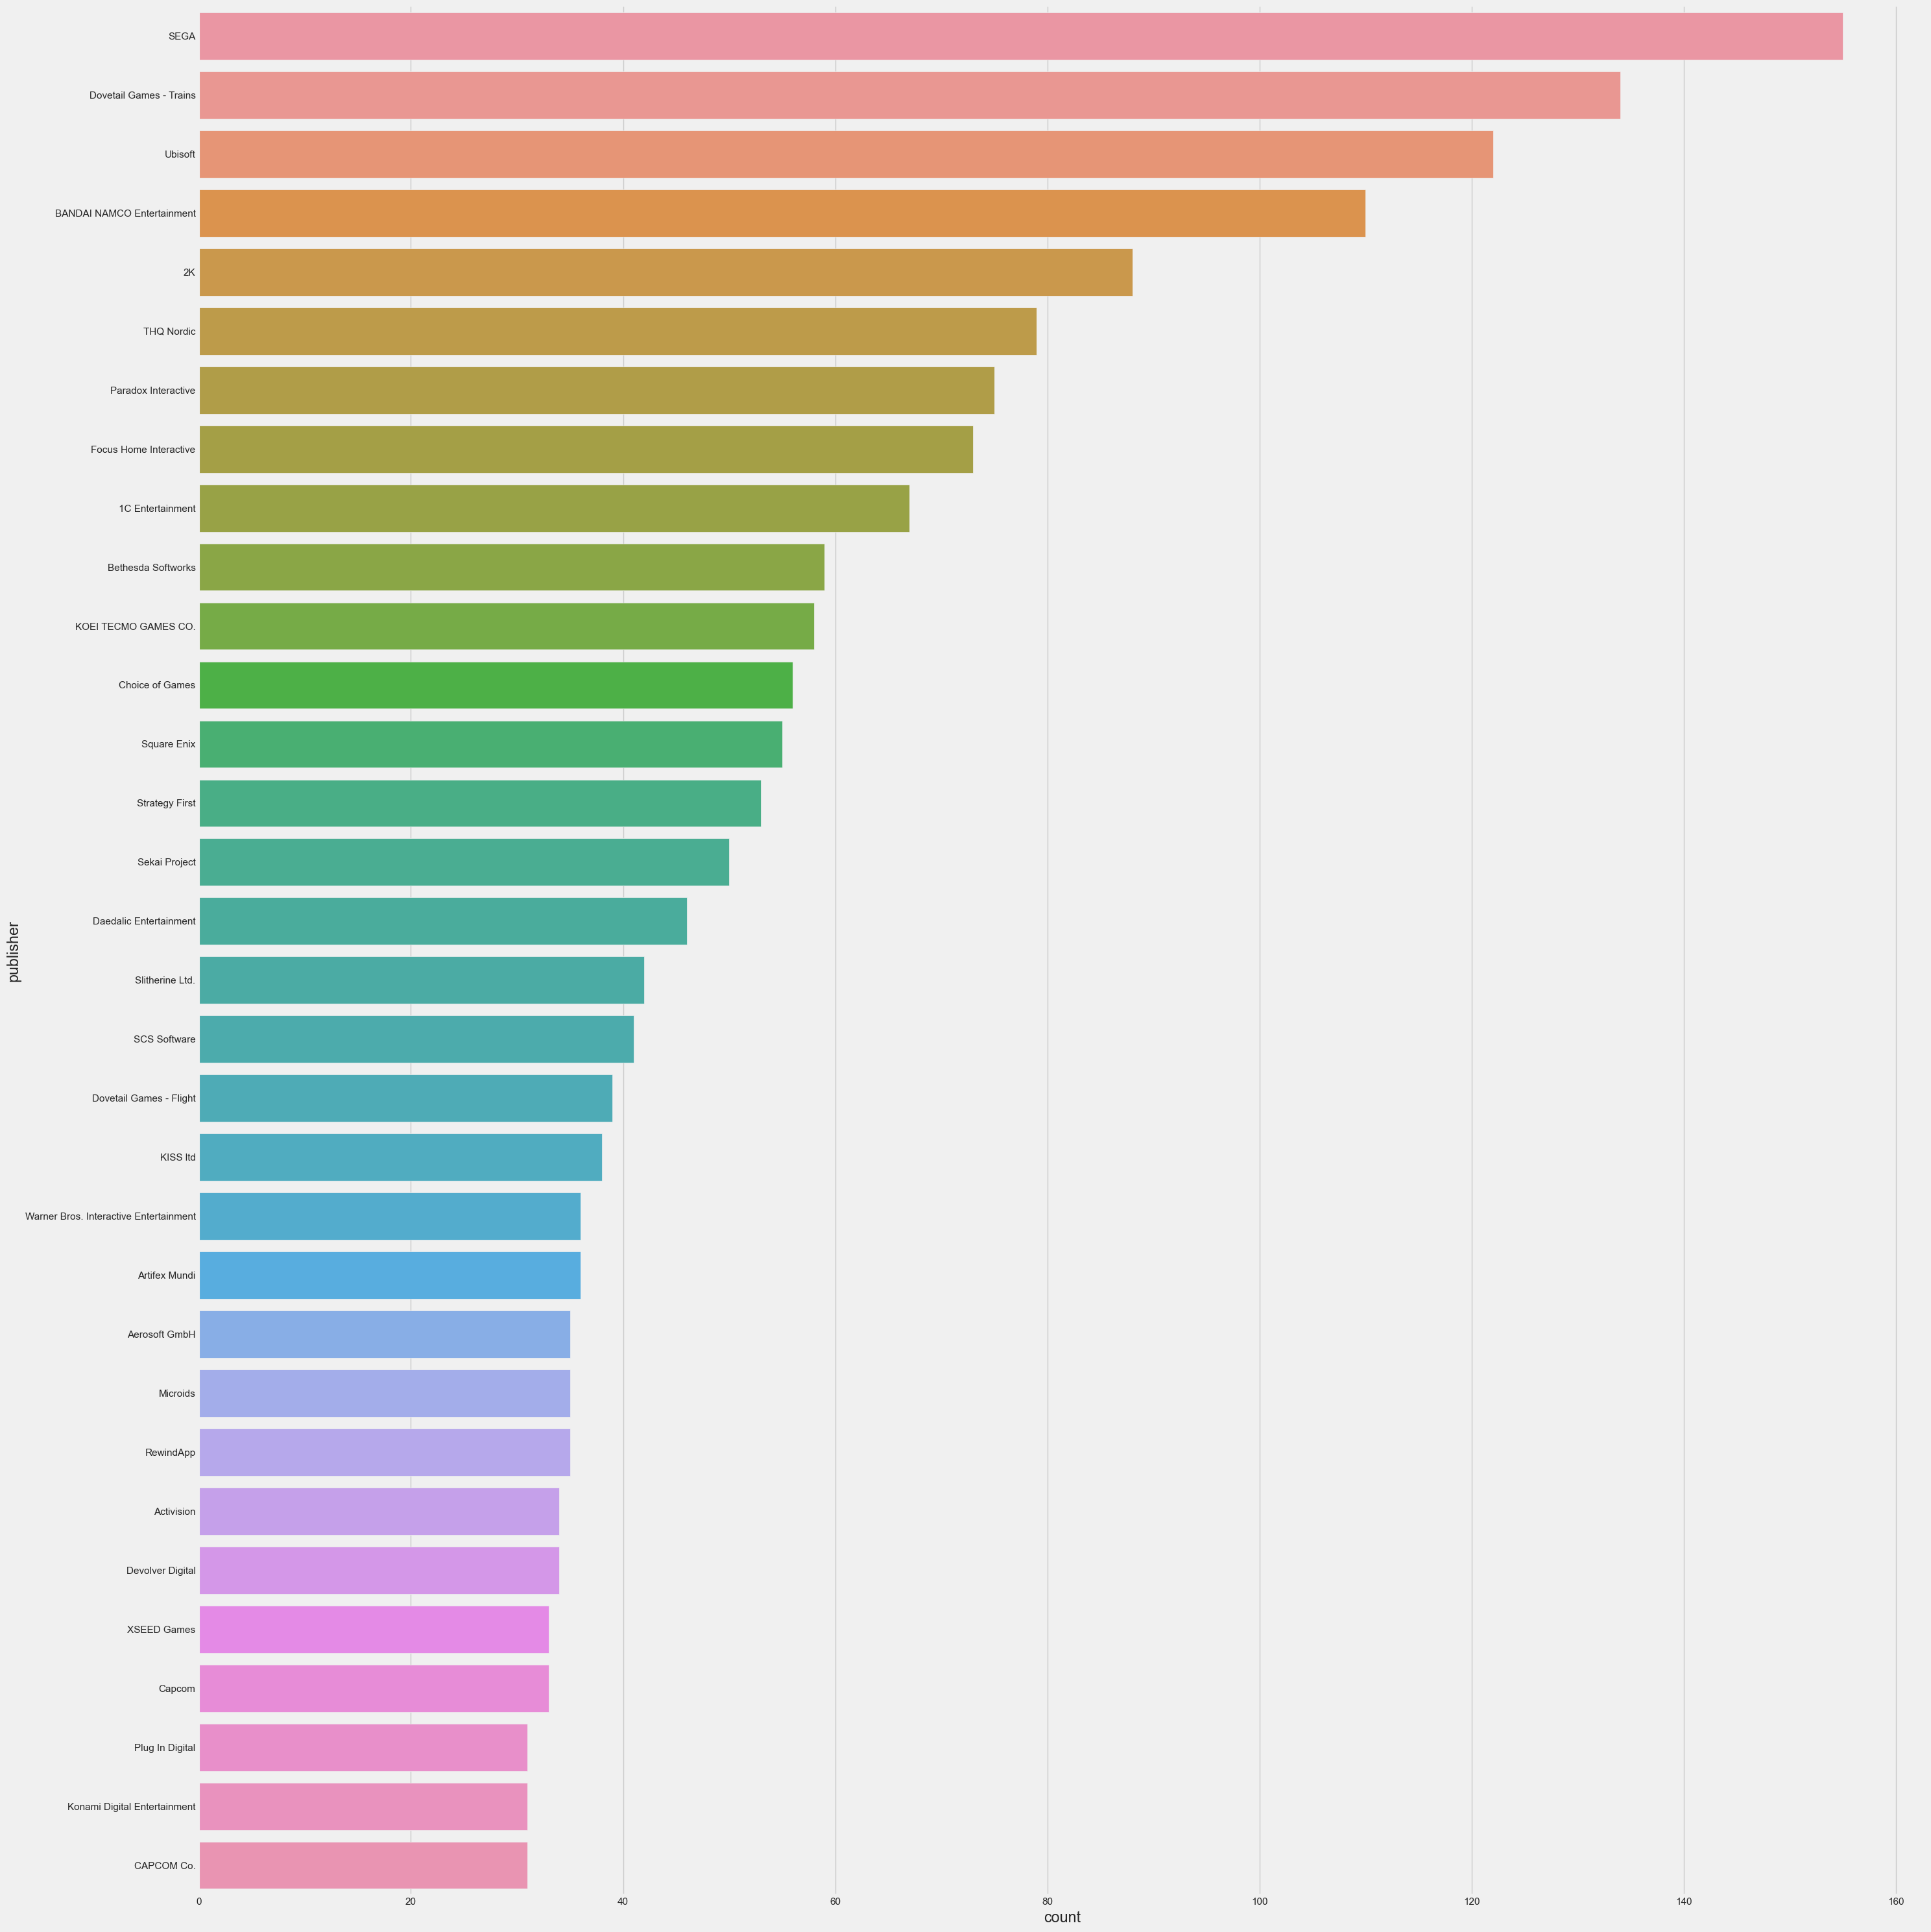

In [30]:
# Publisher

sb.catplot(y = "publisher", data = morepublisher, kind = "count", order = morepublisher['publisher'].value_counts().index, height = 30)

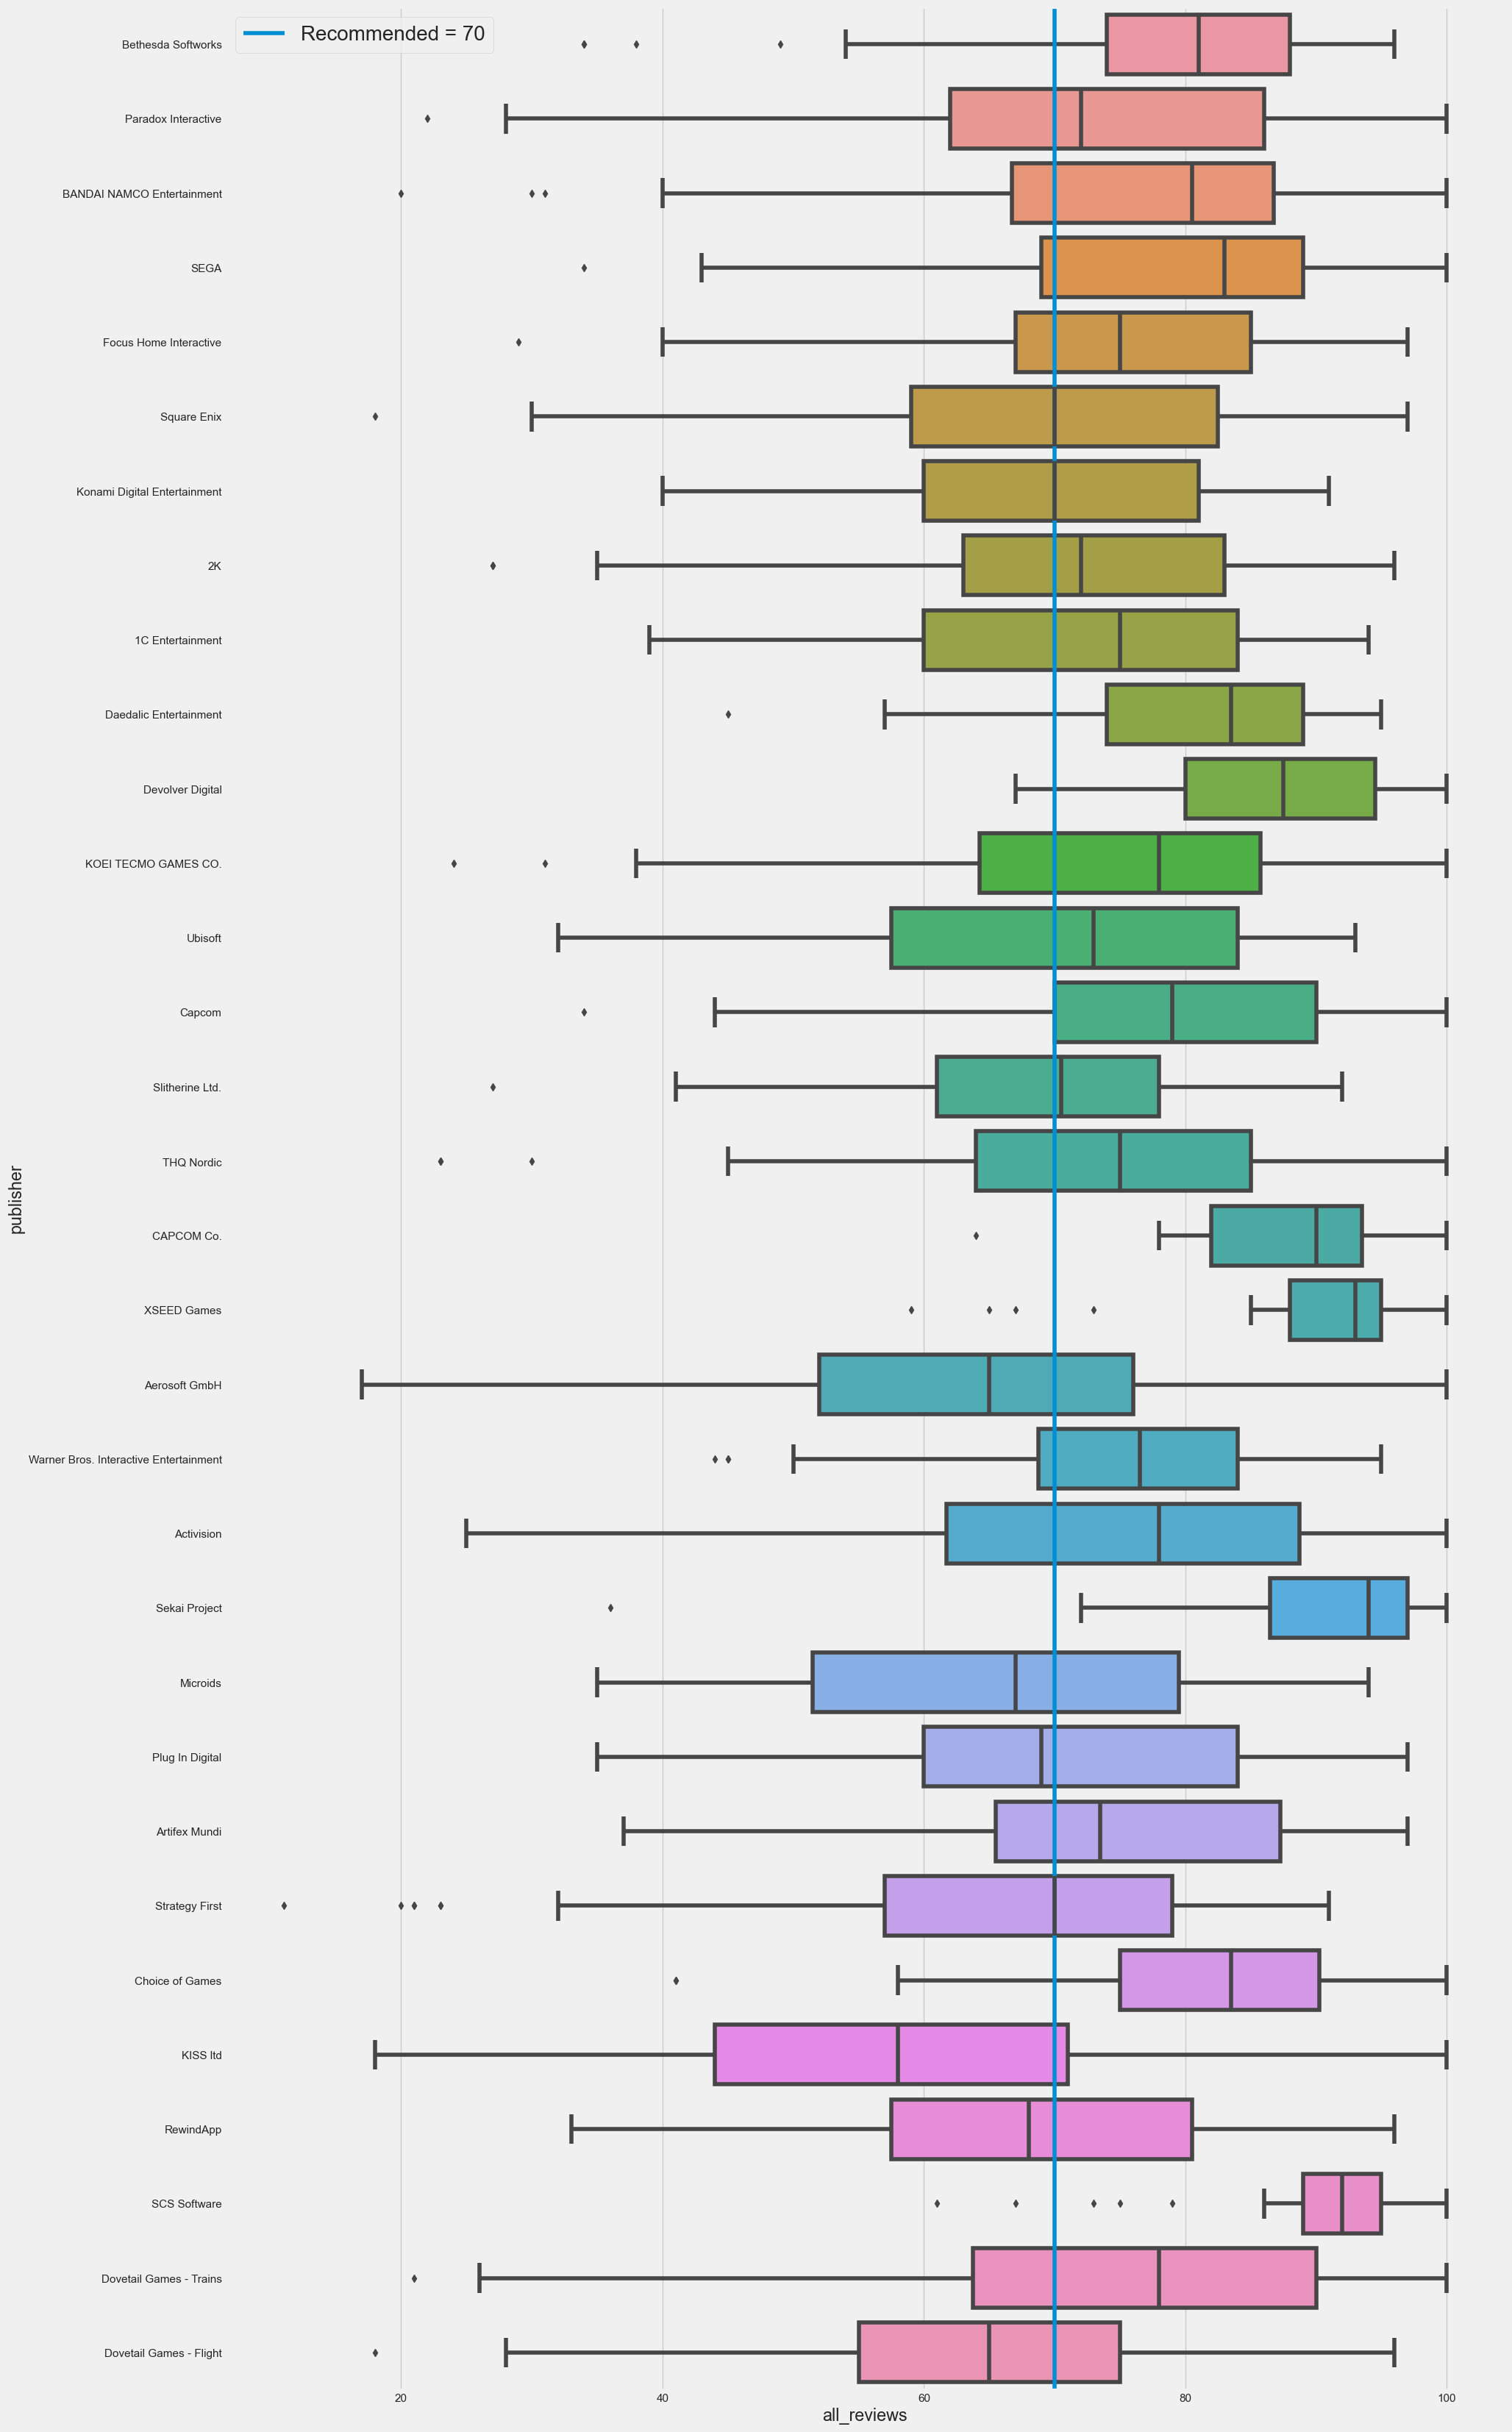

In [31]:
# Publisher vs all reviews

f = plt.figure(figsize=(20, 40))
sb.boxplot(x = "all_reviews", y = "publisher", data = morepublisher, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("all_reviews",fontsize=30)
ax.set_ylabel("Publisher",fontsize=30)
plt.axvline(70, label= "Recommended = 70")
plt.legend(fontsize=20)

plt.show()

From the data, we observe that the Sekai Project and SCS Software publishers have one of the highest (25 percentile, median, and 75 percentile) all_reviews, KISS Itd and Aerosoft GmbH have one of the lowest (25 percentile, median, and 75 percentile) all_reviews.

### Popular tags

In [32]:
pd.DataFrame(categorical_games['popular_tags'])

,popular_tags
0,"[FPS, Gore, Action, Demons, Shooter, First-Per..."
1,"[Survival, Shooter, Multiplayer, Battle Royale..."
2,"[Mechs, Strategy, Turn-Based, Turn-Based Tacti..."
3,"[Survival, Zombies, Open World, Multiplayer, P..."
4,"[Space, Massively Multiplayer, Sci-fi, Sandbox..."
...,...
40481,"[Indie, Adventure, Action, Casual, Sexual Cont..."
40524,"[Action, Indie, Adventure, Puzzle, Atmospheric..."
40598,"[Simulation, Indie, Space, Exploration, Atmosp..."
40611,"[Adventure, Indie, Point & Click]"


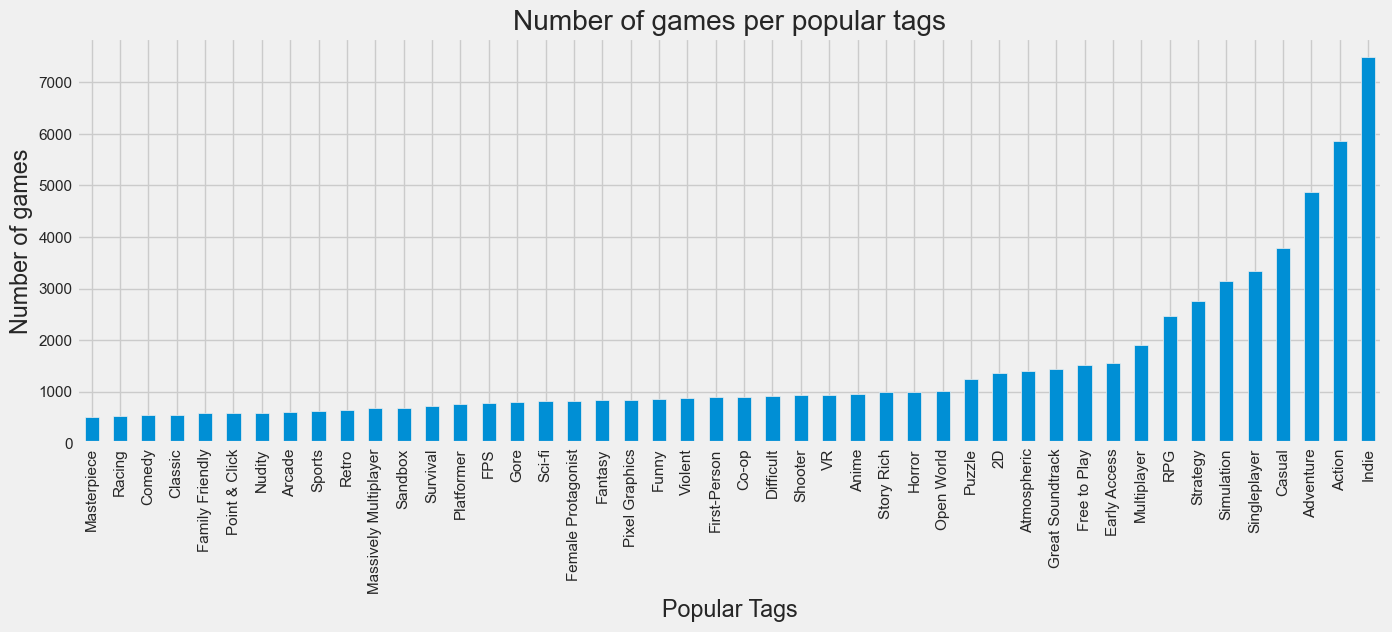

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create a sample dataset
allpopulartags = pd.DataFrame(categorical_games['popular_tags'])

# One-hot-encode the 'popular_tags' column
mlb = MultiLabelBinarizer()
allpopulartags = pd.DataFrame(mlb.fit_transform(allpopulartags['popular_tags']), columns=mlb.classes_)

# Sort all popular tags 
allpopulartags_sum_sorted = allpopulartags.sum().sort_values()

# Only show popular tags that are tagged more than 500 games
allpopulartags_sum_sorted_filtered = allpopulartags_sum_sorted[allpopulartags_sum_sorted >= 500]

# create a bar chart
fig, ax = plt.subplots(figsize=(15, 5))
allpopulartags_sum_sorted_filtered.plot(kind='bar', ax=ax)

# set plot labels
ax.set_title('Number of games per popular tags')
ax.set_xlabel('Popular Tags')
ax.set_ylabel('Number of games')

# show the plot
plt.show()

Since multiple popular tags are attached to one game, it is quite difficult to see if the relationship between popular tags and recommend and all reviews. So, in an attempt to see if there is a correlation between them, the first popular tag in the list of popular tags was taken to compare, as the popular tags do not seem to be arranged in the alphabetical order or by the id order, so there may be another reason that the genres are arranged in such a way, with one reason being it was decided as the most relevant popular tag associated to the game.

In [34]:
categorical_games['first_popular_tag'] = games['popular_tags'].str[0]


C:\Users\User\AppData\Local\Temp\ipykernel_14236\17252035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_games['first_popular_tag'] = games['popular_tags'].str[0]


In [35]:
categorical_games['first_popular_tag'].value_counts()

Action               2050
Indie                1460
Early Access         1185
Adventure            1103
Strategy              920
                     ... 
Crafting                1
War                     1
Agriculture             1
Military                1
Trading Card Game       1
Name: first_popular_tag, Length: 179, dtype: int64

There are many different `first_popular_tag` found in this dataset, so we will only be looking at popular tags which were tagged by `least 30` games so that it would be at least follow a normal distribution via central limit theorem.

In [36]:
value_counts = categorical_games['first_popular_tag'].value_counts()
to_change = value_counts[value_counts >= 30].index
morepopulartags = categorical_games[categorical_games['first_popular_tag'].isin(to_change)]
morepopulartags = pd.concat([morepopulartags, games['all_reviews']], axis = 1)

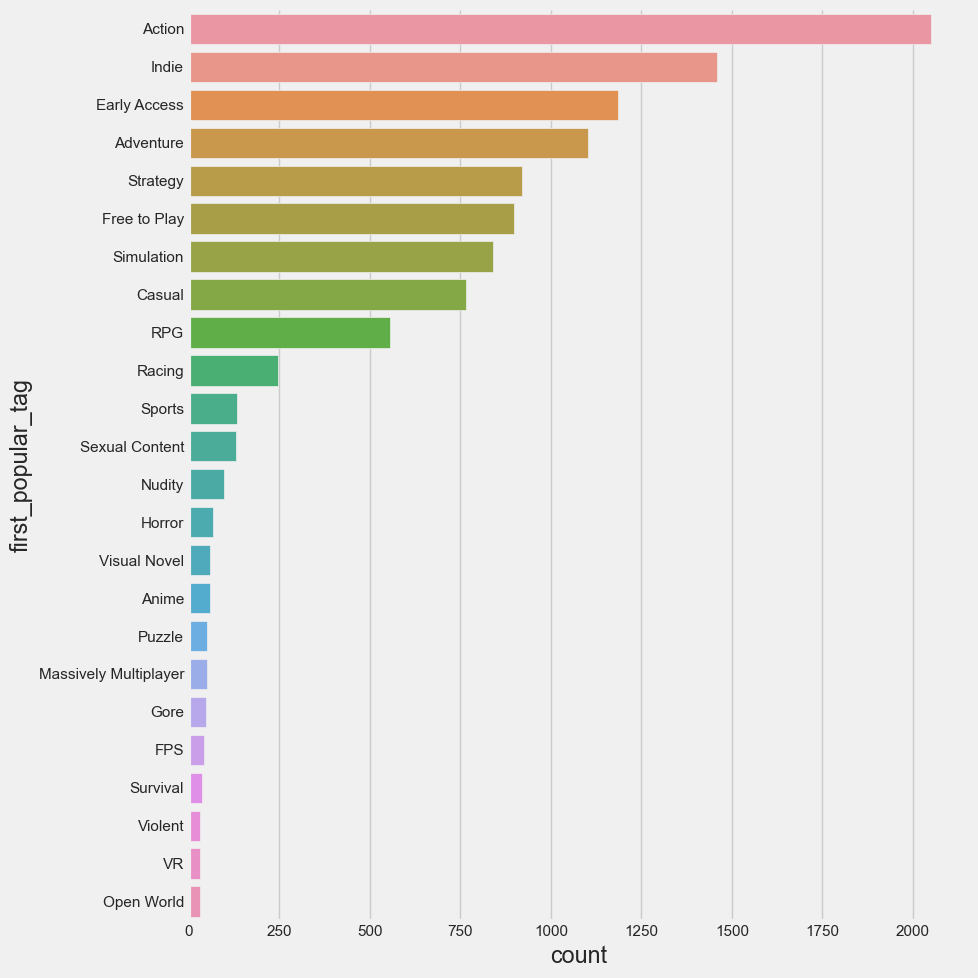

In [37]:
sb.catplot(y = "first_popular_tag", data = categorical_games, kind = "count",  order = morepopulartags['first_popular_tag'].value_counts().index, height = 10 )

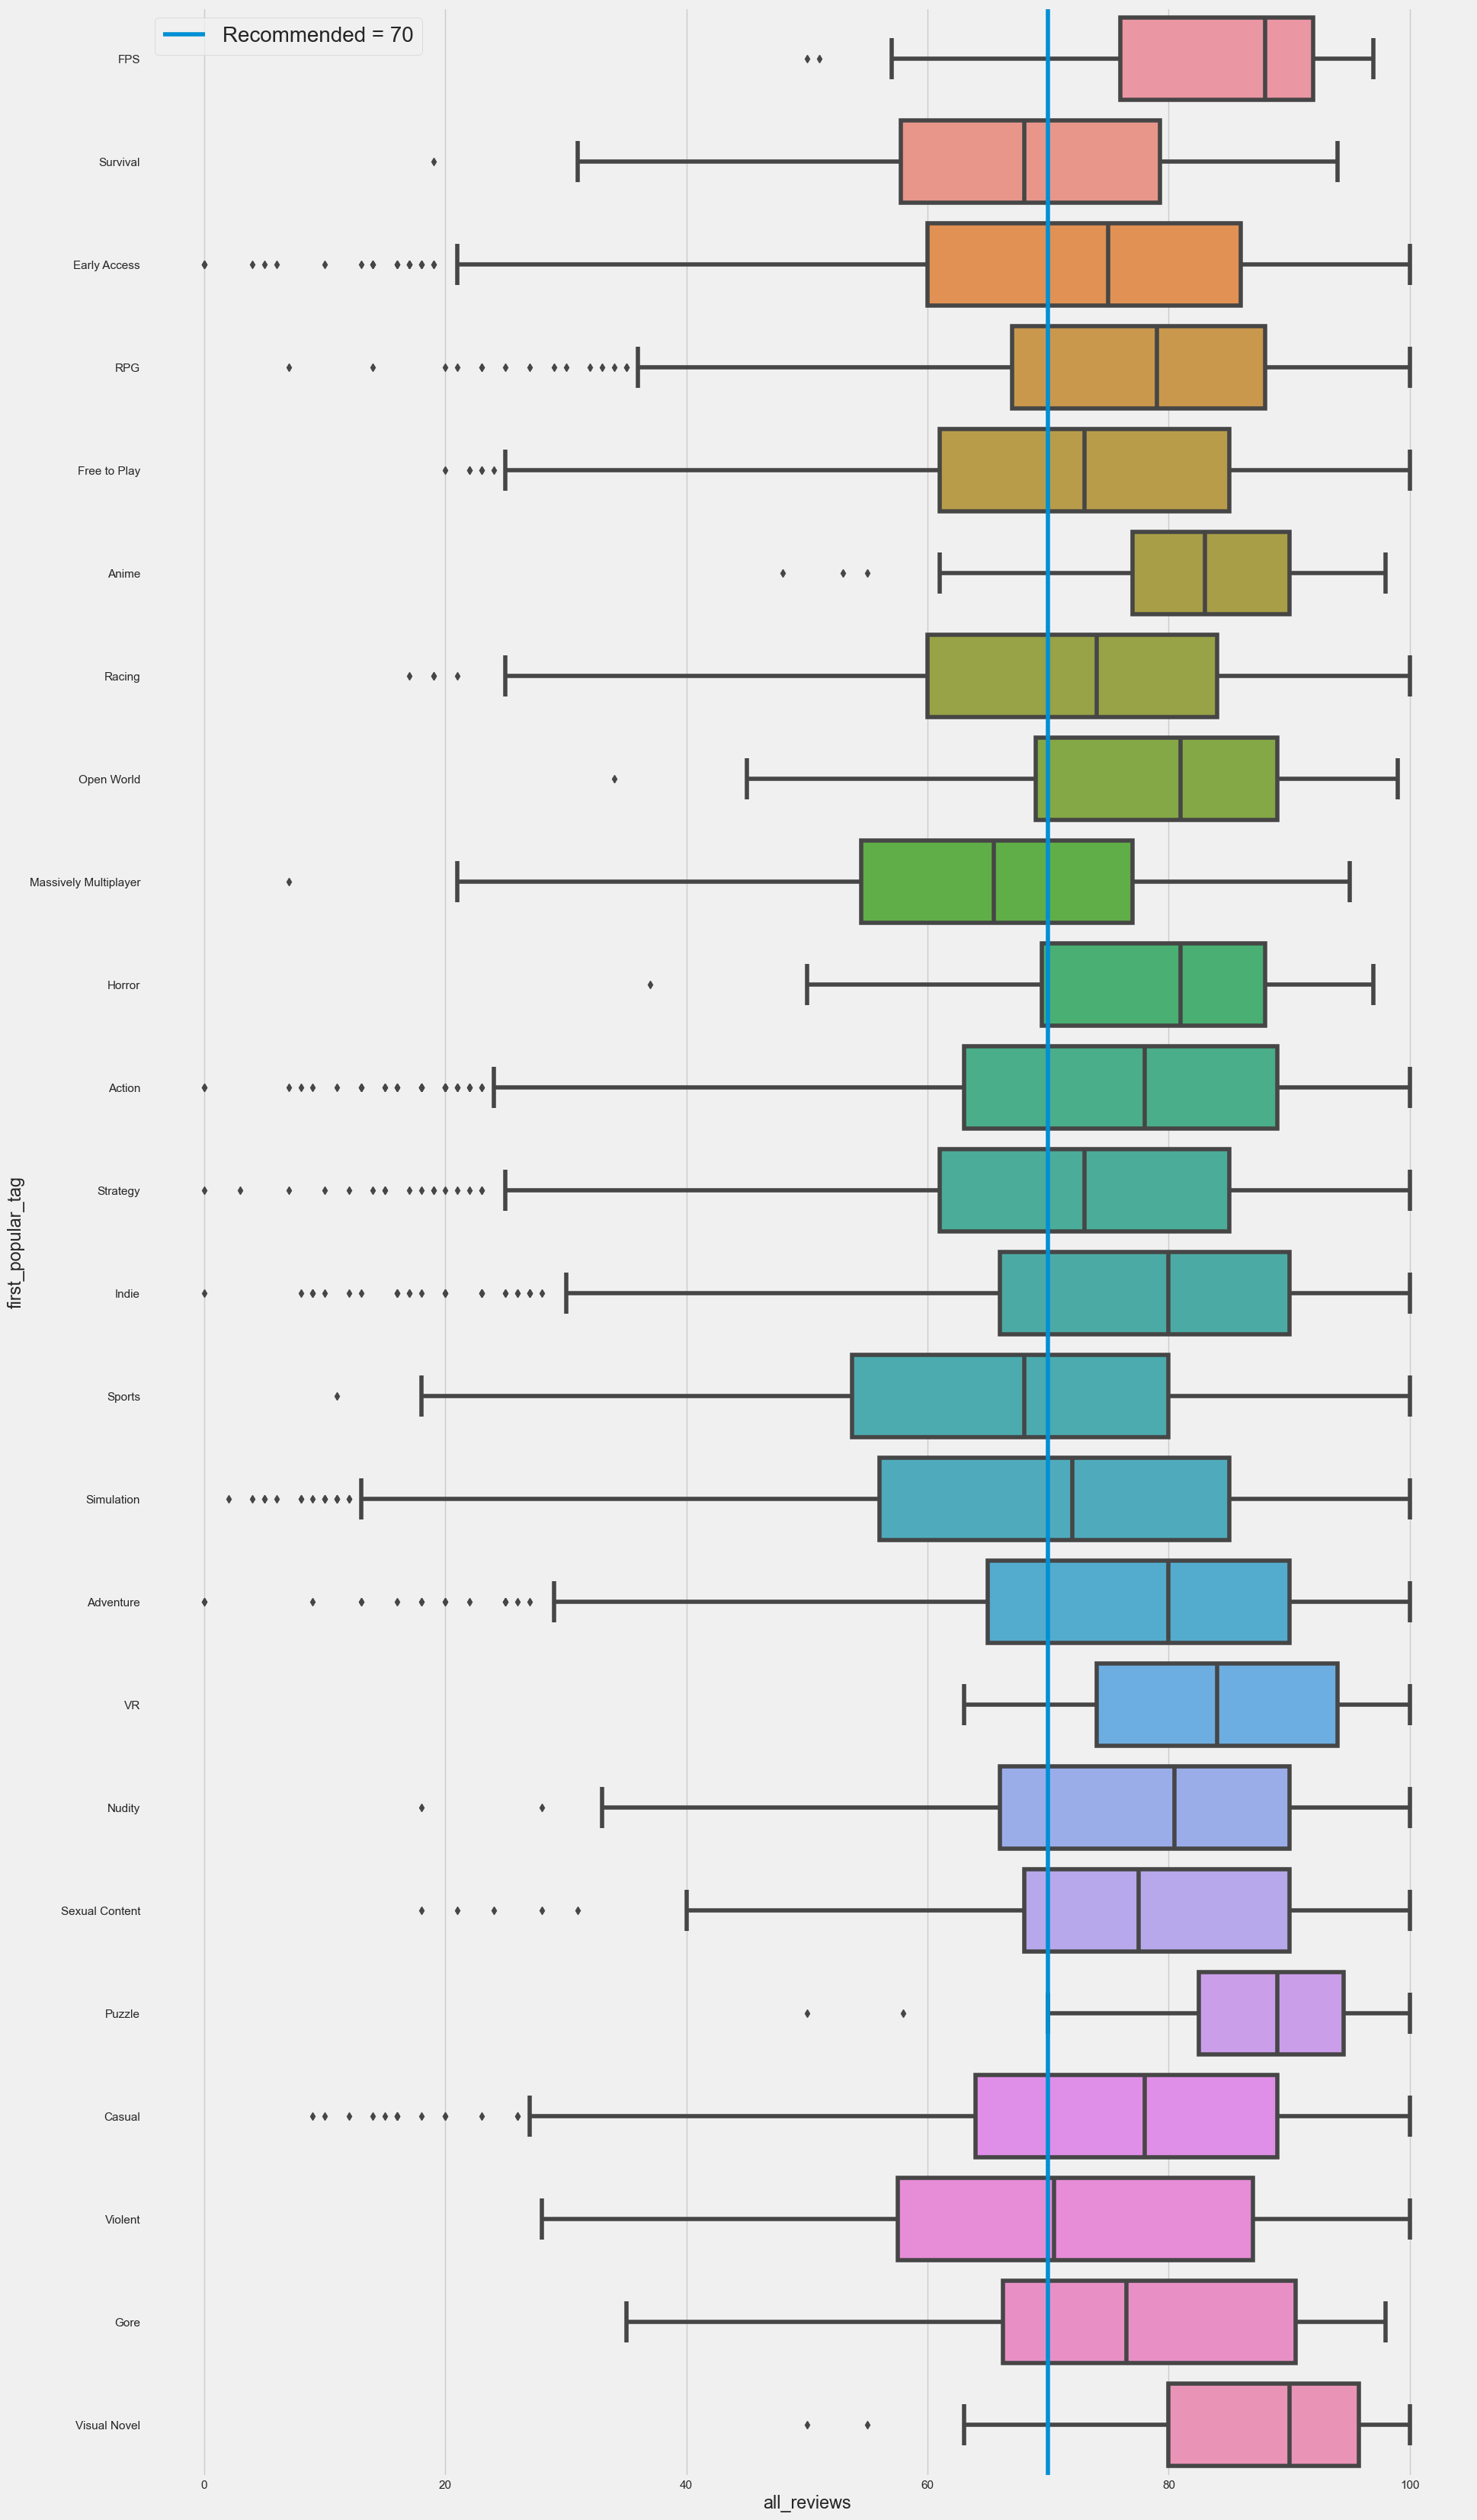

In [38]:
# First_popular_tag vs all reviews vs recommend

f = plt.figure(figsize=(20, 40))
sb.boxplot(x = "all_reviews", y = "first_popular_tag", data = morepopulartags, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("all_reviews",fontsize=30)
ax.set_ylabel("first_popular_tag",fontsize=30)
plt.axvline(70, label= "Recommended = 70")
plt.legend(fontsize=20)
plt.show()

From the data, we observe that the Massively Multiplayer, Simulation, Sport, Violent popular tags have one of the lower all reviews, and Visual Novel, Puzzle, VR and FPS having one of the higher all reviews. However, predicting via the first popular tag is still quite unreliable as multiple popular tags are attached to the game and we are not sure as to how they are arranged so we will not use first popular tag to predict if a game is recommended.

# Data Clustering

As we have seen from the Exploratory Data Analysis above, there are a lot of different `popular tags, developers and publishers`. It is not possible to directly plug in all the categorical variables into machine learning models because it will create a substantial amount of `noise` that will negatively affect the `machine learning` process. Thus, we `cluster` them to different clusters based on their structure and pattern to reduce the noise in machine learning part. 

## Dealing with categorical variables

Now, we are going to change our categorical data into numerical form by `OneHotEncoding` because our Machine Learning Models can only deal with numerical data.

`Linear Regression` and `Random Forest Regression `in `sklearn` do not handle categorical variables directly as a part of the current implementation. Thus, we will need to encode the levels of a categorical variable as integers. One way to encode nominal (unordered) categorical variables by integers is `OneHotEncoding`. 

### One Hot Encoding

In [39]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
games_pub_dev = games[['publisher', 'developer']]
ohe.fit(games_pub_dev)
games_pub_dev_ohe = pd.DataFrame(ohe.transform(games_pub_dev).toarray(), 
                                  columns=ohe.get_feature_names_out(games_pub_dev.columns))

# Check the encoded variables
games_pub_dev_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11620 entries, 0 to 11619
Columns: 13819 entries, publisher_  to developer_黄昏フロンティア
dtypes: float64(13819)
memory usage: 1.2 GB


In [40]:
games_pub_dev_ohe.head()

,publisher_,publisher_ AYE Technology,publisher_ Aerosoft GmbH,publisher_ Casual Trash Studios,publisher_ Expect Studio,publisher_ Fazan,publisher_ FobTi interactive,publisher_ GrabTheGames,publisher_ GungHo Online Entertainment America,publisher_ Imbanova Entertainment Inc.,...,developer_边境游戏工作室,developer_铸城工作室,developer_阿正不经,developer_阿津,developer_阿达游戏,developer_陌上科技,developer_雷武游戏,"developer_風林火山工作室,東木酋長",developer_高考恋爱委员会,developer_黄昏フロンティア
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.preprocessing import MultiLabelBinarizer

# Create a sample dataset
pop_tags = pd.DataFrame(games['popular_tags'])

# One-hot-encode the 'popular_tags' column
mlb = MultiLabelBinarizer()
populartags_encoded = pd.DataFrame(mlb.fit_transform(pop_tags['popular_tags']), columns=mlb.classes_)

# Print the resulting dataframe
populartags_encoded

,1980s,1990's,2.5D,2D,2D Fighter,3D,3D Platformer,3D Vision,4 Player Local,4X,...,Warhammer 40K,Web Publishing,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11616,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
games_cat_ohe = pd.concat([games_pub_dev_ohe, populartags_encoded], axis = 1)
games_cat_ohe.set_index(games.index, inplace=True)

Since the `number of columns` created by `One Hot Encoding` is `too large`, it will create a substantial amount `noise` to distrub the Machine Learning process, thus we have to cluster them into some clusters to reduce to number of columns. We are going to use K-Means to do the job, however, there are too many columns, K-Means cannot handle it directly. Therefore we use Principal Component Analysis (PCA) to achieve dimensionality reduction, information compression, and data de-noising before using K-Means to do the clustering.

## Principal Component Analysis (PCA)

In [43]:
# Import PCA
from sklearn.decomposition import PCA

# PCA for publisher
X = games_cat_ohe

# Create a PCA object with 5 components
pca = PCA(n_components=5)

# Fit the PCA model to the data
pca.fit(X)

# Transform the data using the PCA model
X_pca = pca.transform(X)

# Create a new DataFrame with the transformed data
pca_result = pd.DataFrame(X_pca, columns = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5'])

pca_result.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,1.806730,-1.180988,0.431373,-0.233018,-1.313362
1,0.597781,-1.892431,1.268355,-0.415593,0.220497
2,1.311166,-0.523666,0.717348,0.846000,-0.153626
3,1.325266,-1.224910,0.647467,-0.260496,1.231451
4,0.475429,-1.394737,1.379358,0.360248,0.544307


## K-means Clustering

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(pca_result)

# Create a k-means object with 3 clusters
kmeans = KMeans(n_clusters= 5, random_state=42)

# Fit the k-means object to the data
kmeans.fit(data_std)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original data
Kmeans_result = pd.DataFrame(labels, columns = ['k_cluster'])

Kmeans_result.value_counts()

k_cluster
1            3222
4            3027
0            2752
3            1487
2            1132
dtype: int64

In [45]:
# Reset index of Kmeans_result to plot the relationship between each cluster and all reviews and recommend
Kmeans_result.set_index(games.index, inplace=True)
Kmeans_result

,k_cluster
0,3
1,2
2,2
3,2
4,2
...,...
40481,4
40524,4
40598,1
40611,4


The result of clustering is categorical in nature but the values in the column are integer (0, 1, 2, 3, 4). Therefore, we use One hot Encoding to convert the categorical clusters to 0 and 1 before sending the data to deal with machine learning. 

In [46]:
# Perform one-hot encoding on the 'k_cluster' column of the 'Kmeans_result' dataframe
clusters_ohe = pd.get_dummies(Kmeans_result['k_cluster'], prefix = 'K_cluster')
clusters_ohe.head()

,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [47]:
# Reset index of clusters
clusters_ohe.set_index(games.index, inplace=True)

In [48]:
games = pd.concat([games, clusters_ohe], axis = 1)

### Visualization of clusters

<AxesSubplot:xlabel='K_cluster_4', ylabel='recommend'>

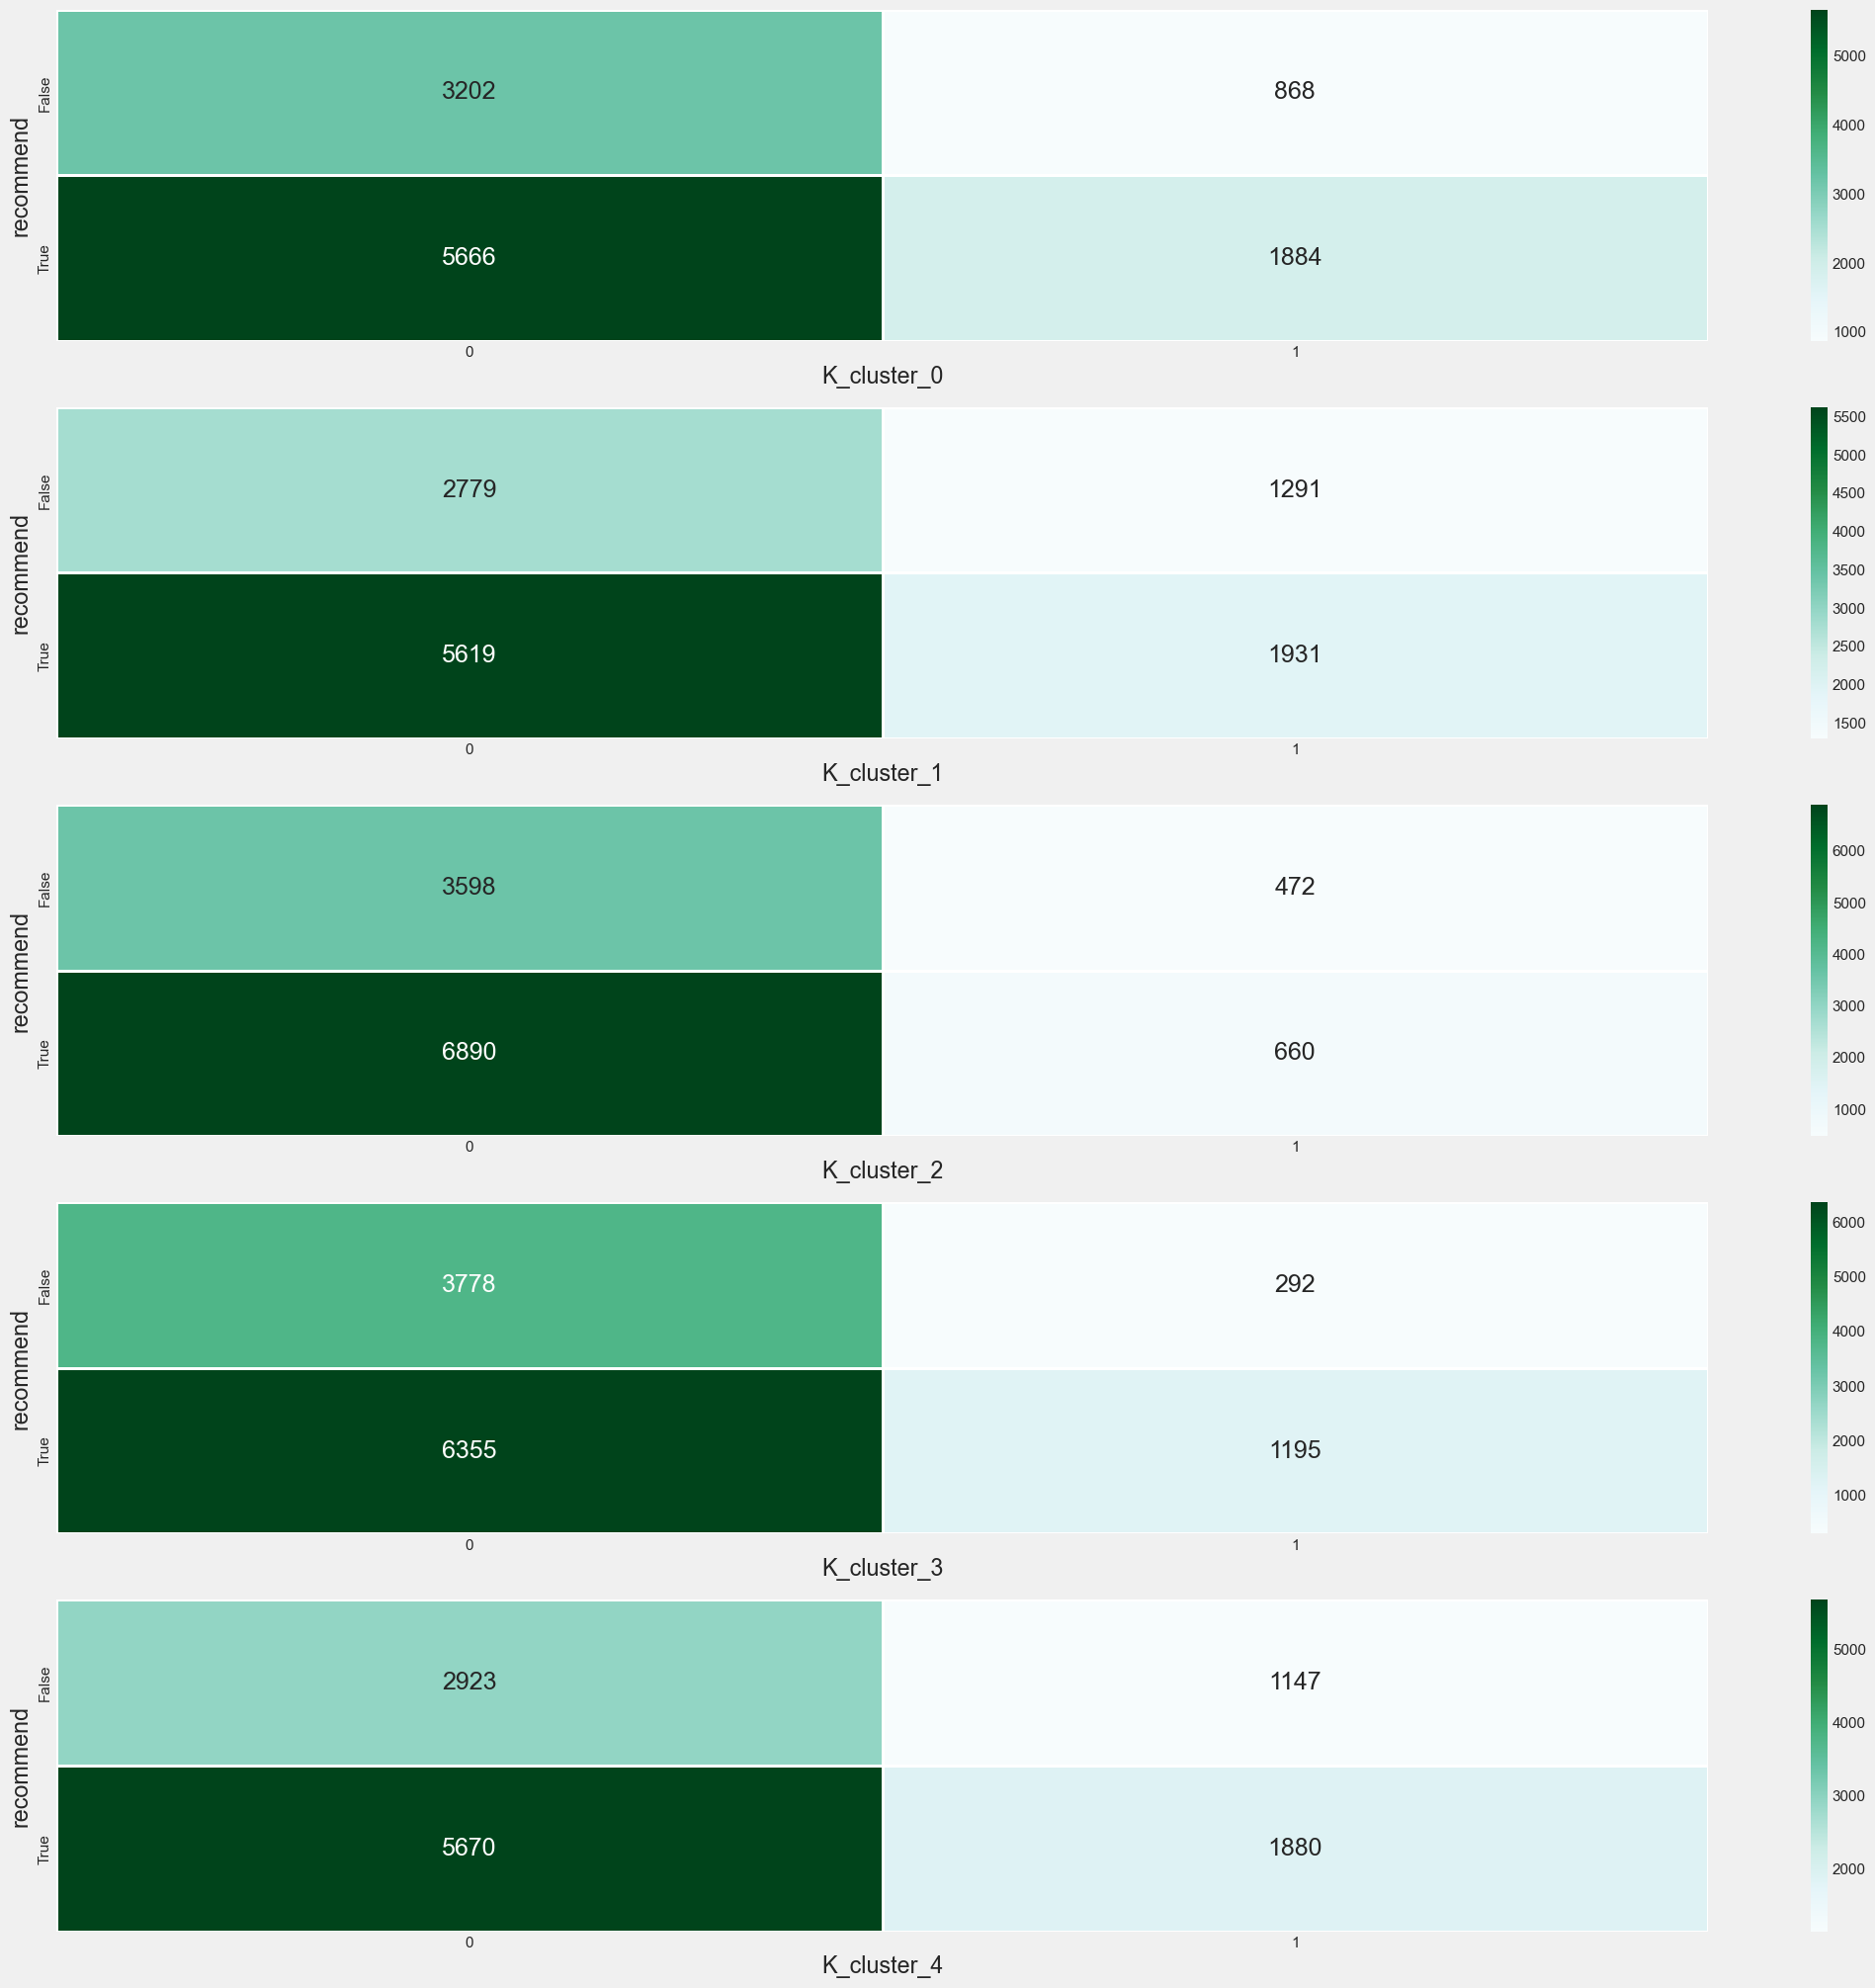

In [49]:
# Alternative view of Clusters vs Recommend
f, axes = plt.subplots(5, 1,figsize=(24, 24))

sb.heatmap(games.groupby(['recommend', 'K_cluster_0']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[0])
sb.heatmap(games.groupby(['recommend', 'K_cluster_1']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[1])
sb.heatmap(games.groupby(['recommend', 'K_cluster_2']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[2])
sb.heatmap(games.groupby(['recommend', 'K_cluster_3']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[3])
sb.heatmap(games.groupby(['recommend', 'K_cluster_4']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn", ax = axes[4])


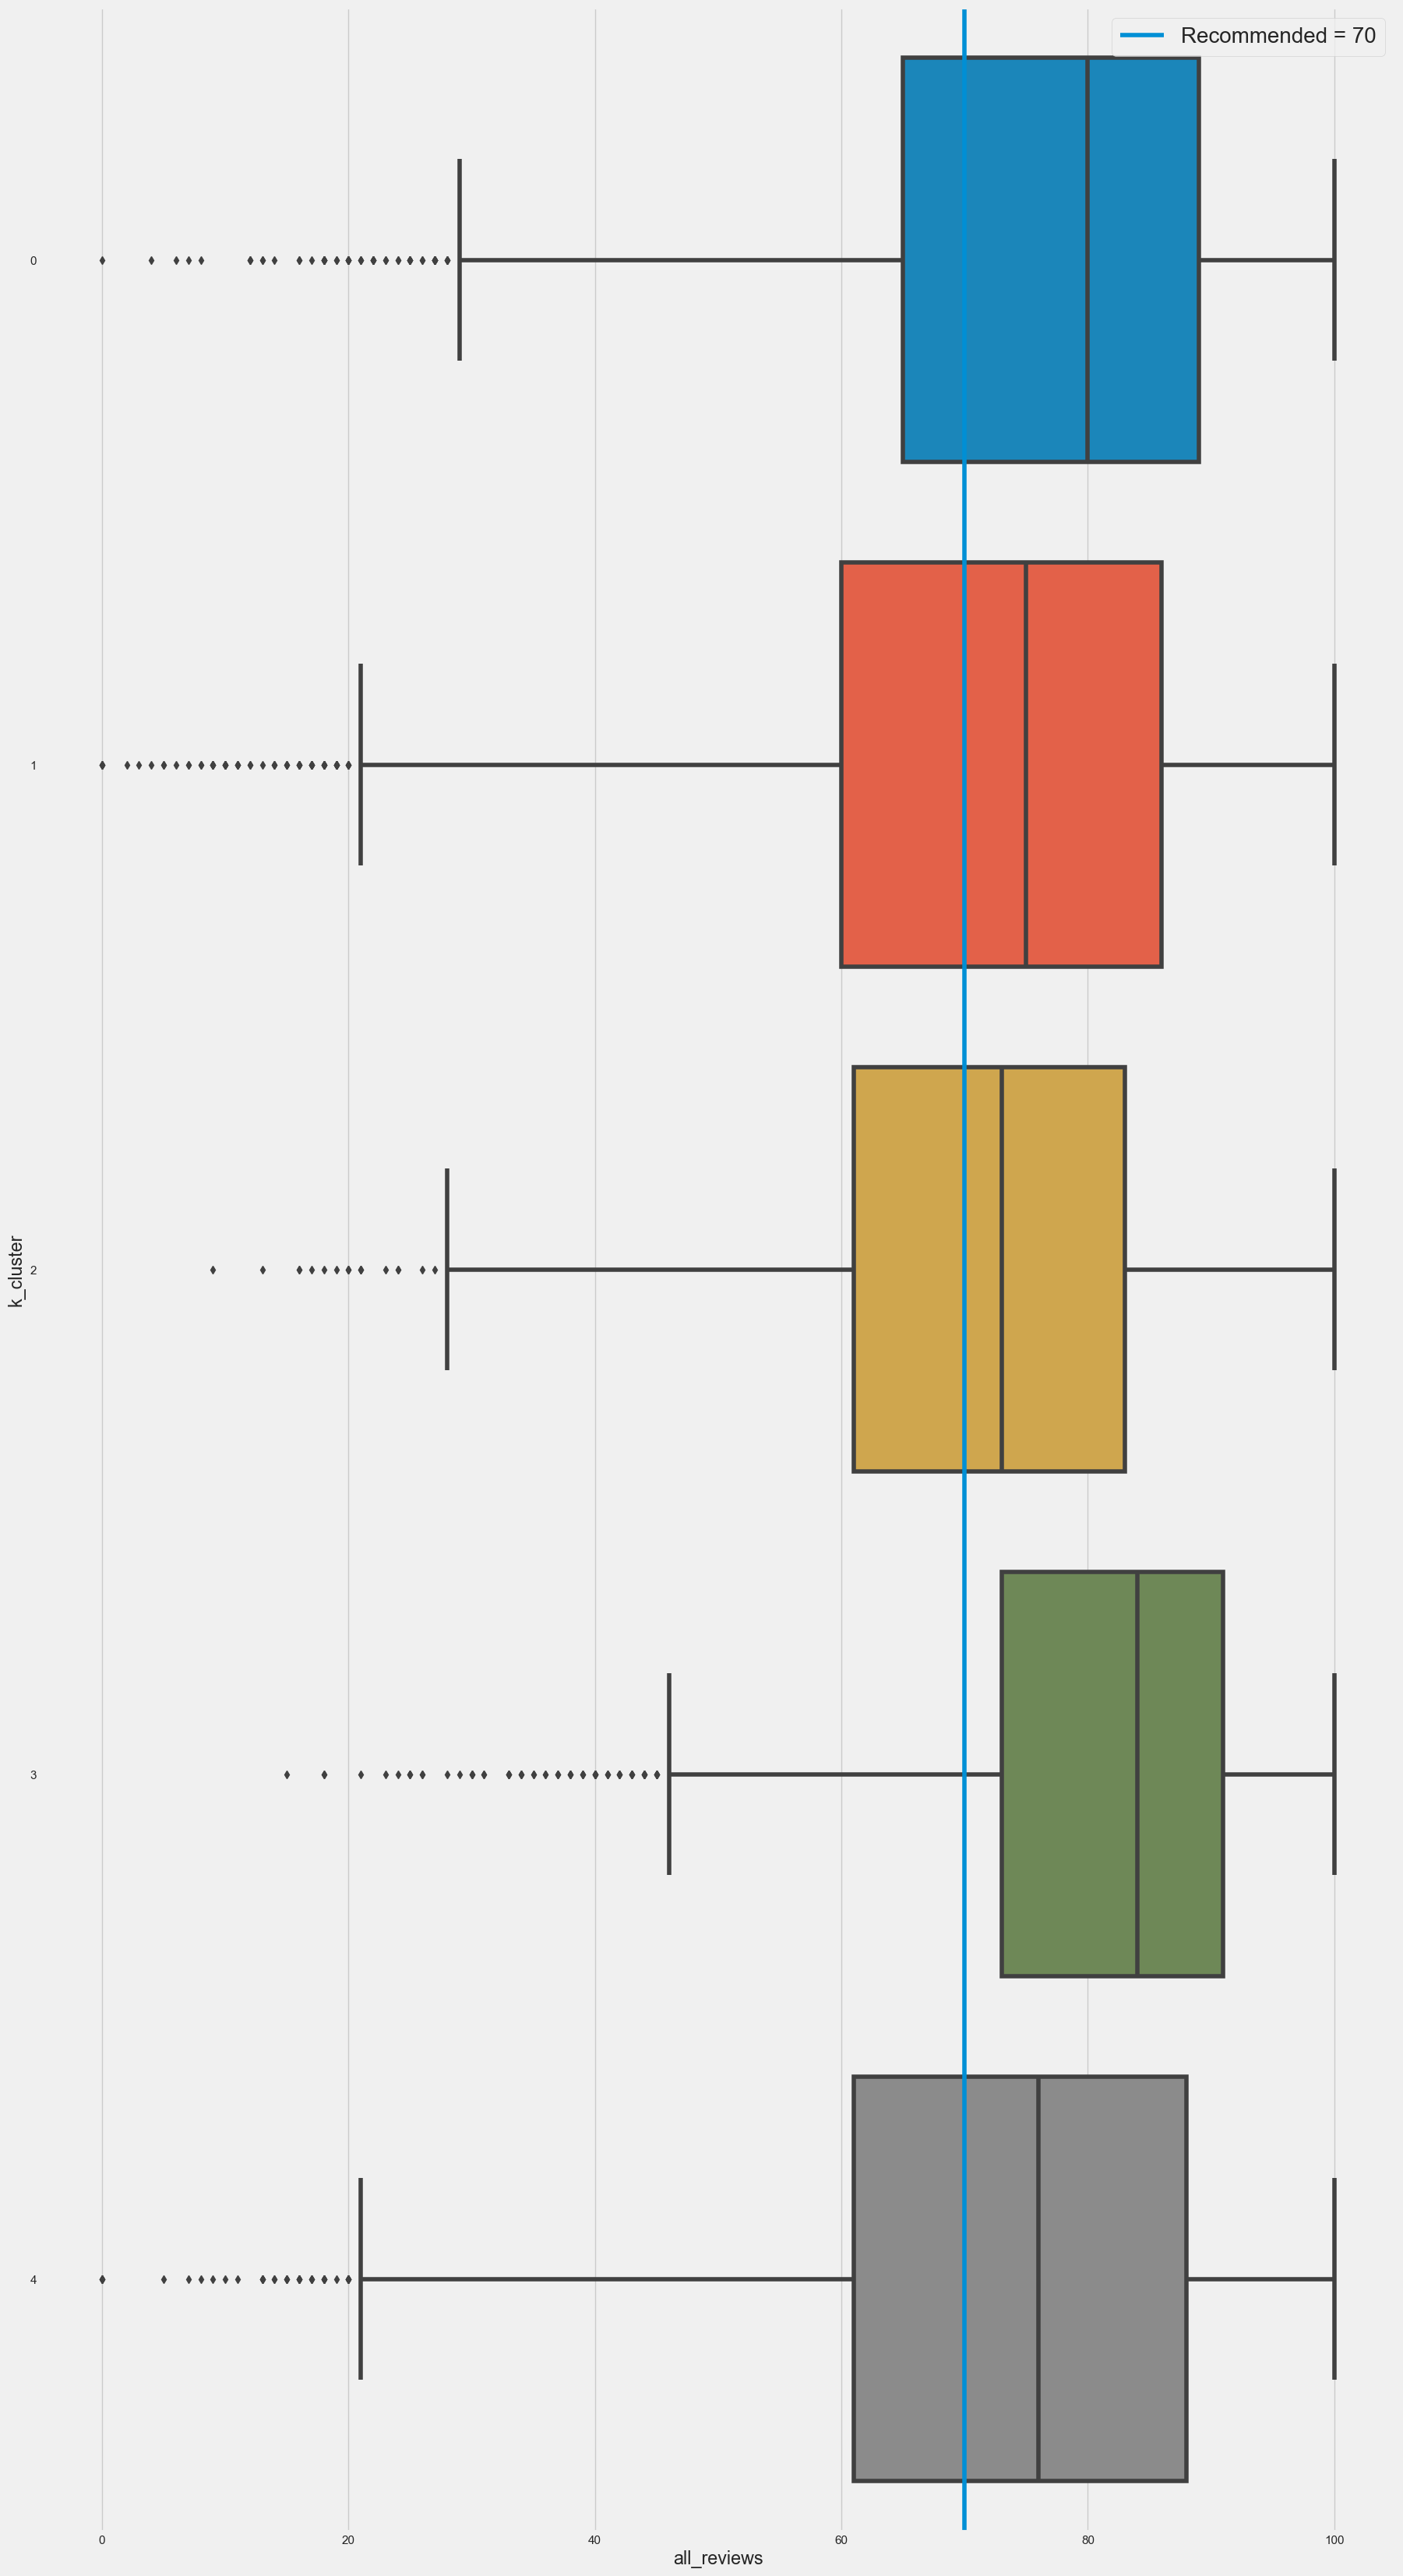

In [50]:
# K_clusters vs all reviews vs recommend

# Reset index of Kmeans_result to plot the relationship between each cluster and all reviews and recommend
Kmeans_result.set_index(games.index, inplace=True)
Kmeans_result

K_clusters_allreviews_recommend = pd.concat([Kmeans_result, games[['all_reviews', 'recommend']]], axis = 1)
f = plt.figure(figsize=(20, 40))
sb.boxplot(x = "all_reviews", y = "k_cluster", data = K_clusters_allreviews_recommend, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("all_reviews",fontsize=30)
ax.set_ylabel("K_cluster",fontsize=30)
plt.axvline(70, label= "Recommended = 70")
plt.legend(fontsize=20)
plt.show()

In [51]:
list(games)

['name',
 'all_reviews',
 'recommend',
 'release_date',
 'release_date_epoch_days',
 'developer',
 'publisher',
 'popular_tags',
 'languages',
 'genre',
 'mature_content',
 'original_price',
 'discount_price',
 'discount_percentage',
 'genre_Action',
 'genre_Adventure',
 'genre_Casual',
 'genre_Massively Multiplayer',
 'genre_RPG',
 'genre_Racing',
 'genre_Simulation',
 'genre_Sports',
 'genre_Strategy',
 'K_cluster_0',
 'K_cluster_1',
 'K_cluster_2',
 'K_cluster_3',
 'K_cluster_4']

In [60]:
# Data to be used in Machine Learning
games_prediction = games[[
 'recommend',
 'original_price',
 'discount_price',
 'discount_percentage',
 'mature_content',
 'genre_Action',
 'genre_Adventure',
 'genre_Casual',
 'genre_Massively Multiplayer',
 'genre_RPG',
 'genre_Racing',
 'genre_Simulation',
 'genre_Sports',
 'genre_Strategy',
 'K_cluster_0',
 'K_cluster_1',
 'K_cluster_2',
 'K_cluster_3',
 'K_cluster_4',
]]

games_prediction.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0


In [61]:
games_prediction.to_csv('games-prediction-resampling.csv')